# **Investigation into the Effect of Dimensionality Reduction Techniques in Machine Learning Algorithms**

## **Background and Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. All patients here are females at least 21 years old of Pima Indian heritage

### **Goal**

The goal of the project is to delve into the efficacy of dimensionality reduction techniques, notably PCA and LDA, in enhancing the accuracy and efficiency of machine learning algorithms.

<b>Data Dictionary</b>:

- Pregnancies: Discrete. The number of times the patient has been pregnant.<br>
- Glucose: Continuous. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.<br>
- BloodPressure: Continuous. Diastolic blood pressure (mm Hg).<br>
- SkinThickness: Continuous. Triceps skinfold thickness (mm).<br>
- Insulin: Continuous. 2-Hour serum insulin (mu U/ml).<br>
- BMI: Continuous. Body mass index (weight in kg/(height in m)^2).<br>
- DiabetesPedigreeFunction: Continuous. A function that scores likelihood of diabetes based on family history.<br>
- Age: Continuous. Age in years.<br>
- Outcome: Categorical. Class variable (0 or 1) where 1 indicates the presence of diabetes<br>

# **Import necessary libraries**

In [1]:
# ! pip install xgboost
# ! pip install imblearn

In [2]:
# Importing essential libraries for data handling and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations

# Preprocessing and model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score  # Splitting data and cross-validation
from sklearn.preprocessing import StandardScaler  # Feature scaling
from imblearn.over_sampling import RandomOverSampler  # Oversampling for imbalanced data

# Imputation for handling missing values
from sklearn.impute import SimpleImputer

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Model performance metrics
from sklearn.metrics import (accuracy_score, recall_score, auc, precision_score, 
                             f1_score, confusion_matrix, classification_report,
                             precision_recall_curve, roc_auc_score, roc_curve, log_loss)
from sklearn.model_selection import learning_curve

# Dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Set option to display all columns
pd.set_option('display.max_columns', None)

# **Step 1: Exploratory Data Analysis (EDA) and Preprocessing**

- Load the dataset, handle missing values, and perform EDA.<br>

- Split the dataset into features (X) and target (y).<br>

- Normalize the features.<br>

- Split the data into training, validation, and testing sets.<br>

In [4]:
# Load the dataset
# pima_dataset = pi_df
pi_df = pd.read_csv('diabetes.csv')

In [5]:
# Display the first few rows of the dataset
pi_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
# check first dimension of data set
pi_df.shape

(768, 9)

The dataset has 768 rows and 9 columns

In [7]:
# Basic information about the dataset
pi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The Pima Dataset two (2) features have float datatype and 7 of the features having integer datatype

In [8]:
#checking unique values in different variables
unique_values = {}
for col in pi_df.columns:
    unique_values[col] = pi_df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Pregnancies                               17
Glucose                                  136
BloodPressure                             47
SkinThickness                             51
Insulin                                  186
BMI                                      248
DiabetesPedigreeFunction                 517
Age                                       52
Outcome                                    2

In [9]:
# check duplicates
pi_df.duplicated().sum()

0

The dataset has no duplicates

In [10]:
# Check for missing values
pi_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In finding missing values we saw none

In [11]:
# Summary statistics
pi_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

- The dataset doesn't have any missing values, which is great. However, from the statistical summary, we can observe that some columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a minimum value of 0, which might be biologically implausible (e.g., a blood pressure of 0). These zero values might represent missing or unrecorded data. We will replace the zeros  with NaN (to represent missing data) and then impute these NaN values.

- The Oldest person is 81 whereas the yongest is 21. 

- The highest recorded number of pregnancies is 17 and least is 0.

### Replacing missing values

In [12]:
# Columns where zero values are not feasible
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

- We will replace the missing values with median as median is not affected by outliers

In [13]:
# Replace zeros with NaN
pi_df[cols_with_zeros] = pi_df[cols_with_zeros].replace(0, float('nan'))

# Impute NaNs with the median of the respective columns
imputer = SimpleImputer(strategy='median')
pi_df[cols_with_zeros] = imputer.fit_transform(pi_df[cols_with_zeros])


In [14]:
# Sanity check of statistic summary
pi_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

All the zeros have been replaced. Glucose minimum value now reports 44, BloodPressure's minimum value is 24, SkinThickness is 7, Insulin 14 and BMI is 18.20

In [15]:
# Create a copy of the dataframe
data = pi_df.copy()

## **Exploratory Data Analysis**

- We will visualize the data to understand distributions, relationships, and potential anomalies

####  - UNIVARIATE

In [16]:
# Count the frequency of each class in the 'Outcome' column
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
# Set a color palette for Seaborn
sns.set_palette("pastel")

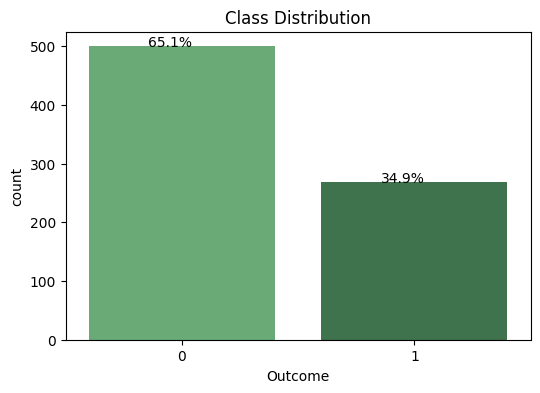

In [18]:
# Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Outcome', data=data, palette = 'Greens_d')
plt.title('Class Distribution')

# Calculate percentages and annotate
total = len(data['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    
# Saving the plot
plt.savefig('pima_class_distribution.png')
plt.show()

Data is not balanced . This may cause the model not to perform well due to the influence of the more frequency class

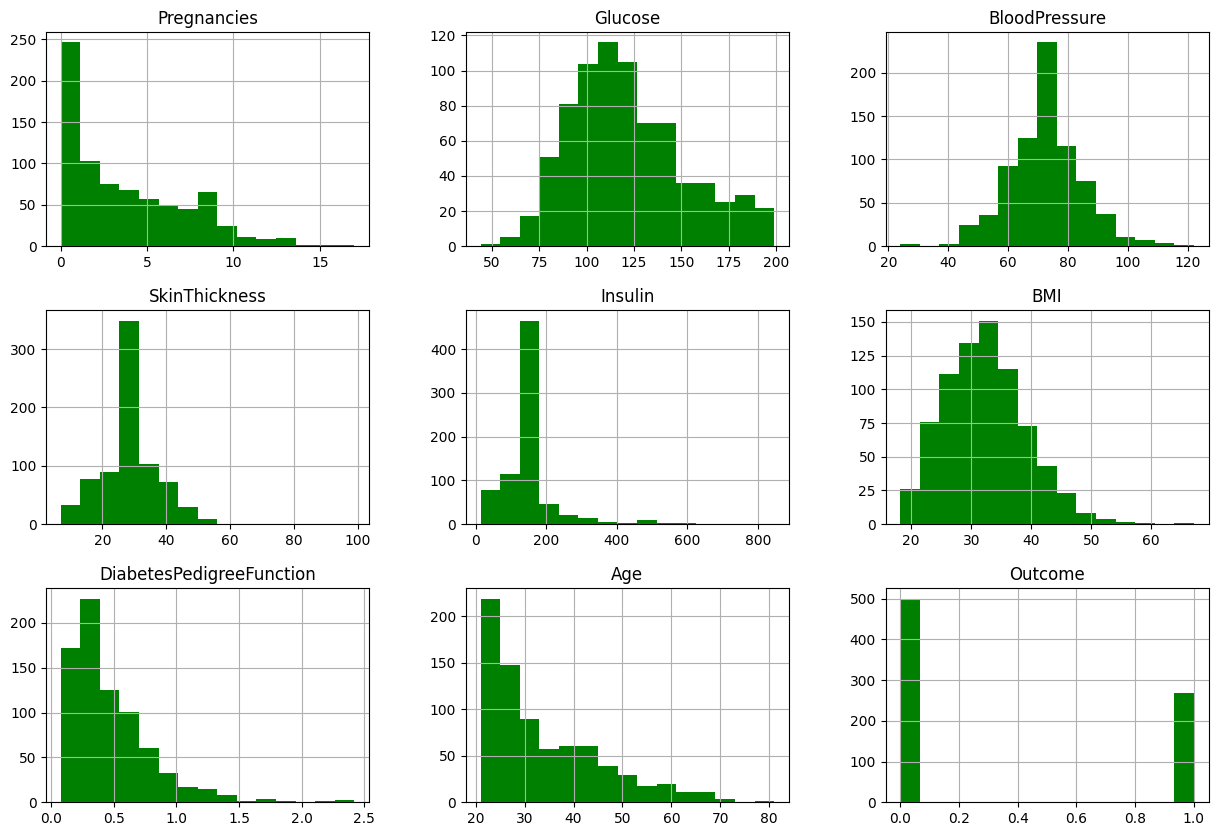

In [19]:
# Histograms for each feature
data.hist(bins=15, figsize=(15, 10), color='green')
plt.show()


 - From the Histplots it is observed that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

In [20]:
# Drop the target column
data_without_target = data.drop('Outcome', axis=1)  # Replace 'Outcome' with the name of your target column if different

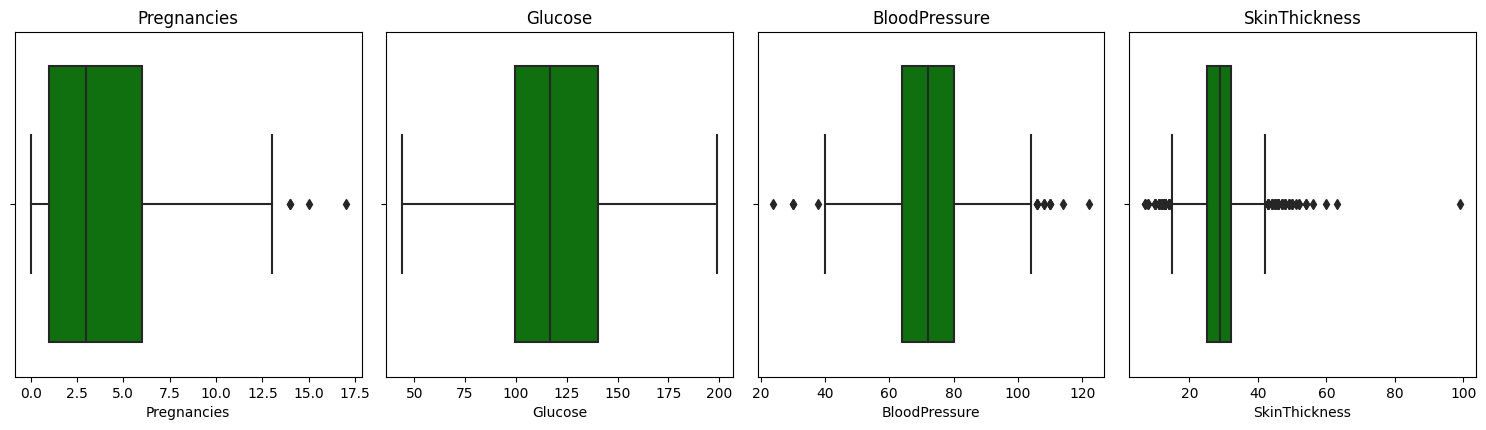

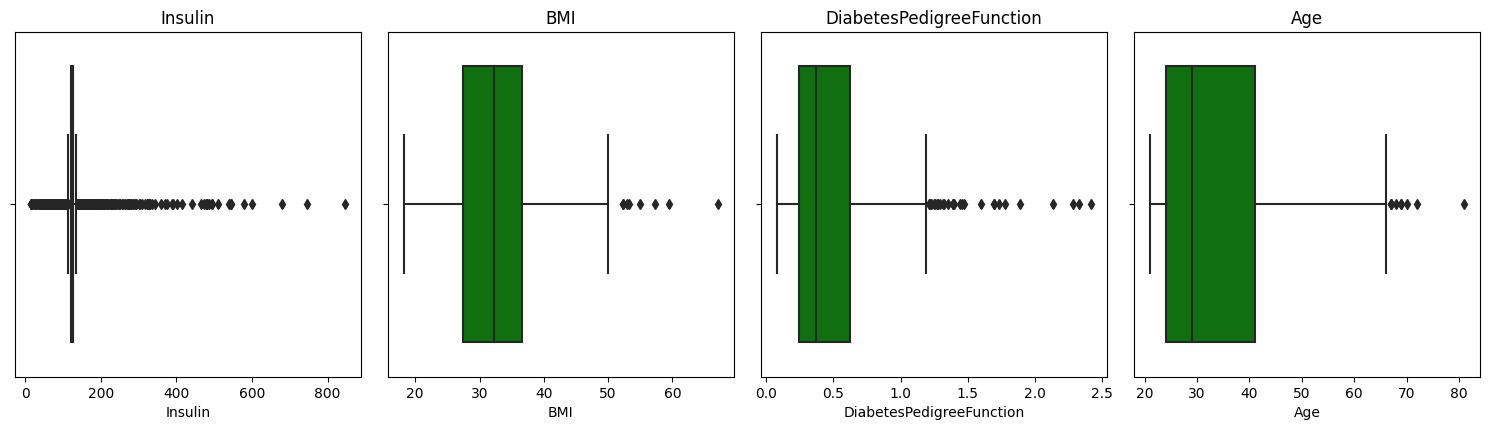

In [21]:
# Boxplots for each feature in a 4x2 grid
num_columns = len(data_without_target.columns)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed

for i, column in enumerate(data_without_target.columns):
    if i % 4 == 0:
        # Create a new figure for every 4th boxplot
        fig = plt.figure(figsize=(15, 8))
    
    plt.subplot(num_rows, 4, i % 4 + 1)
    sns.boxplot(x=data_without_target[column], color='green')
    plt.title(column)

    # If it's the last boxplot in the row or the last boxplot overall, show the plot
    if (i + 1) % 4 == 0 or i == num_columns - 1:
        plt.tight_layout()
        plt.show()
        
        # Save each figure with a unique name
        fig.savefig(f'boxplot_{i // 4 + 1}.png', dpi=300, bbox_inches='tight')


Addressing outliers is essential in data analysis, as they can skew results and violate assumptions. Instead of removing them, which could lead to data loss, it's better to use scaling and transformation techniques to minimize their impact

## Identify Correlation in data 

**Pearson's Correlation Coefficient** is a metric that reveals the relationship strength between two variables, ranging from -1 to +1, where 1 indicates a strong correlation and 0 indicates none.

**Heat Map** is a visual tool that uses color coding to display complex data patterns in a two-dimensional format, making information easier to understand and analyze

In [22]:
# check for correlation
mat_corr = data.corr()
mat_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

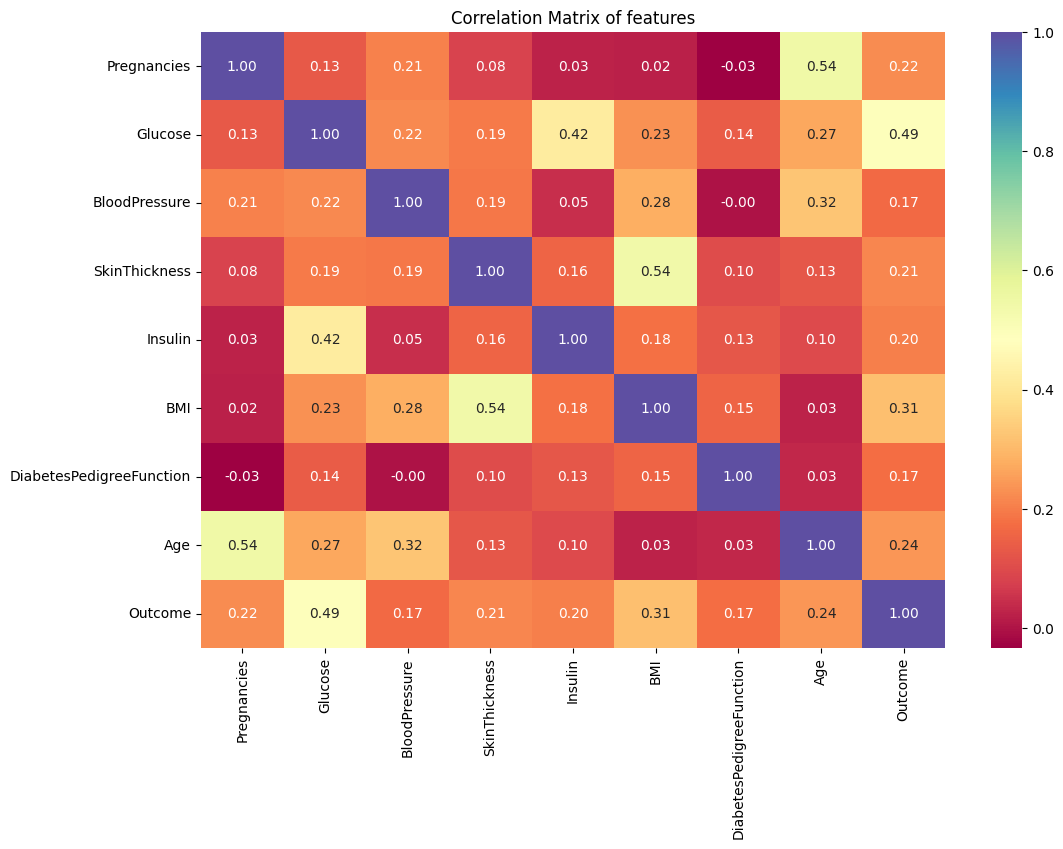

In [23]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title("Correlation Matrix of features")
plt.show()


From the Heat Map it is observed that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model

## Data Preprocessing

### **Splitting the Data**

- Dataset was split into training, validation, and testing sets in an 80:10:10 ratio to avoid overfitting, ensure model generalizability, and validate the model's performance on unseen data 

In [24]:
# Split the dataset into features and target
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [25]:
# Split the data into training (80%) and temporary (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Split the temporary set into testing (50%) and validation (50%) sets
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [26]:
# Normalize the features
scaler = StandardScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

# **Step 2: Train Models on Original Dataset**

- We will train Logistic Regression, Random Forest, and Multilayer Perceptron (MLP), XGBoost and Stacking Classifiers on the original dataset and evaluate their performance. The evaluation metrics will include accuracy, recall, precision, ROC/AUC, and the confusion matrix.


#### Train and evaluate the models:
Implement a function to train and evaluate each model, then store the results in a dataframe

In [27]:
def train_and_evaluate(model, X_train_sd, y_train, X_val_sd, y_val, X_test_sd, y_test):
    # Train the model on the normalized training set
    model.fit(X_train_sd, y_train)

    # Predictions on training, validation, and test sets
    y_pred_train = model.predict(X_train_sd)
    y_pred_val = model.predict(X_val_sd)
    y_pred_test = model.predict(X_test_sd)
#     y_pred_proba_test = model.predict_proba(X_test_sd)[:, 1]
    
    # Check if the model supports 'predict_proba' or 'decision_function'
    if hasattr(model, "predict_proba"):
        y_pred_proba_test = model.predict_proba(X_test_sd)[:, 1]
    elif hasattr(model, "decision_function"):
        # Use decision function if predict_proba is not available
        y_pred_proba_test = model.decision_function(X_test_sd)
    else:
        # For models without either method, use the test predictions directly
        y_pred_proba_test = y_pred_test

    # Store metrics
    metrics = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'train_recall': recall_score(y_train, y_pred_train),
        'train_precision': precision_score(y_train, y_pred_train),
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'val_recall': recall_score(y_val, y_pred_val),
        'val_precision': precision_score(y_val, y_pred_val),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'test_recall': recall_score(y_test, y_pred_test),
        'test_precision': precision_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_test)
    }
    
    # Classification Report
    report = classification_report(y_test, y_pred_test)

    # Store predictions for later use
    predictions = {
        'y_pred_train': y_pred_train,
        'y_pred_val': y_pred_val,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test  # Store probability or decision function output
    }

    return pd.DataFrame(metrics, index=[0]), report, predictions

In [28]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=0, class_weight='balanced', solver = "liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=0, max_depth=6),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss'), # , max_depth= 6
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier())])
}

In [29]:
# Dictionary to store the results, reports, and predictions
results = {}
reports = {}
predictions = {}

for name, model in models.items():
    result, report, prediction = train_and_evaluate(model, x_train_sd, y_train, x_val_sd, y_val, x_test_sd, y_test)
    results[name] = result
    reports[name] = report
    predictions[name] = prediction

### Apply the Dimensionality Reduction Techniques - PCA, LDA, and Autoencoder on Original dataset

#### **Apply Principal Component Analysis (PCA)**

Principal Component Analysis (PCA), is a dimensionality reduction technique commonly used in machine learning and statistics. Its primary goal is to reduce the number of features in a dataset while preserving the most important information or variance in the data. PCA achieves this by transforming the original features into a new set of uncorrelated variables, known as principal components, which are linear combinations of the original features

From the Heat Map we noticed that 5 features correlated better with the target (Outcome)hence we will select 5 features as our n_components.

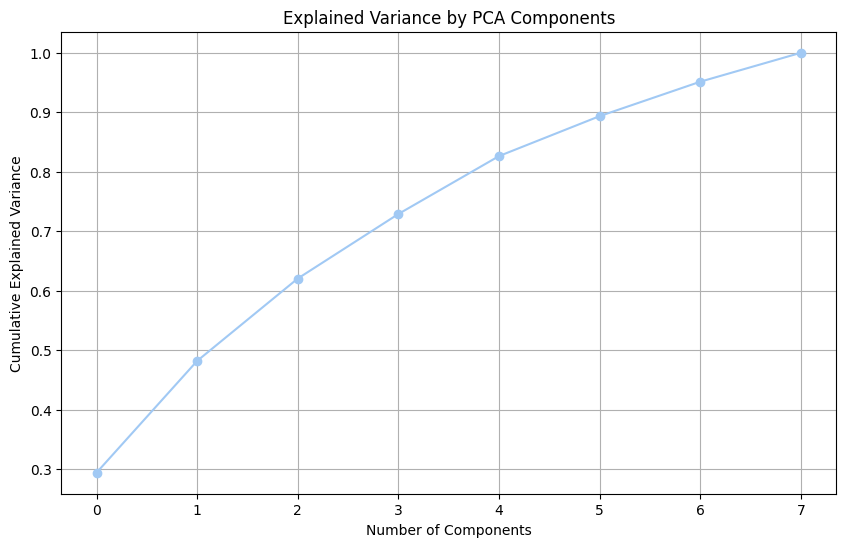

In [30]:
# Apply PCA
pca = PCA()
pca.fit(x_train_sd)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [31]:
pca = PCA(n_components=5)

# Fit and transform with PCA
X_train_pca = pca.fit_transform(x_train_sd)
X_val_pca = pca.transform(x_val_sd)
X_test_pca = pca.transform(x_test_sd)


In [32]:
# Explained variance can help determine the number of components
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = explained_variance.cumsum()
print(cum_explained_variance)

[0.29429594 0.48216572 0.62063081 0.72909574 0.8263987 ]


The five components captures 82% of the total variance.

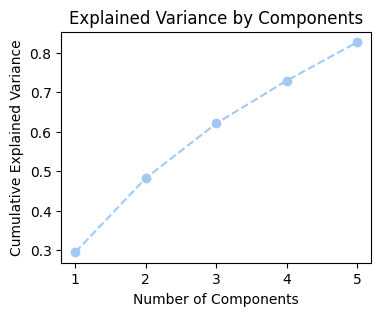

In [33]:
# Visualize

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

#### **Apply Linear Discriminant Analysis (LDA)**

- Linear Discriminant Analysis (LDA) is primarily used for dimensionality reduction in the context of supervised classification 
- The LinearDiscriminantAnalysis (LDA) method for dimensionality reduction aims to find a linear combination of features that best separates multiple classes. The n_components parameter in LDA specifies the number of components (features) you want to retain after the transformation.

However, there is an important limitation for LDA: The maximum number of components you can extract with LDA is C-1, where C is the number of classes in your dataset. This is because LDA aims to find axes that maximize the separation between multiple classes, and if you have C classes, there are at most C-1 axes that can separate them.

Our target variable has two classes (binary classification), then even if you set n_components=2 LDA can only extract a single component

In [34]:
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform with LDA
X_train_lda = lda.fit_transform(x_train_sd, y_train)
X_val_lda = lda.transform(x_val_sd)
X_test_lda = lda.transform(x_test_sd)

#### **Apply Autoencoders**

Autoencoders are a type of artificial neural network architecture used for unsupervised learning. They are particularly useful for dimensionality reduction, feature learning, and data compression. The main idea behind autoencoders is to learn a compressed representation, or encoding, of the input data by minimizing the reconstruction error between the input and the output.

The architecture of an autoencoder consists of an encoder and a decoder:

 - Encoder: This part of the network compresses the input data into a lower-dimensional representation (encoding). It consists of one or more hidden layers that reduce the input features to a compact representation.

- Decoder: This part of the network reconstructs the input data from the compressed representation. It mirrors the structure of the encoder but works in reverse, expanding the compressed representation back to the original input space.

- The training process involves minimizing the difference (reconstruction error) between the input and the output. The network learns to capture the most salient features of the data during this process

In [35]:
# Building autoencoder architecture
def build_custom_autoencoder(input_dim):
    autoencoder = Sequential()
    # Input Layer and first hidden layer
    autoencoder.add(Dense(units=16, activation='relu', input_dim=input_dim))
    # Encoding Layer
    autoencoder.add(Dense(units=7, activation='relu'))  # Bottleneck
    # Decoding Layer
    autoencoder.add(Dense(units=16, activation='relu'))
    # Output Layer
    autoencoder.add(Dense(units=input_dim, activation='sigmoid'))
    
    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder


In [36]:
# Build and train the autoencoder
autoencoder_imbal = build_custom_autoencoder(x_train_sd.shape[1])
autoencoder_imbal.fit(x_train_sd, x_train_sd, epochs=30, batch_size=256, validation_data=(x_val_sd, x_val_sd))


Epoch 1/30
3/3 [==============================] - 0s 44ms/step - loss: 1.2504 - val_loss: 1.5428
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 1.2438 - val_loss: 1.5361
Epoch 3/30
3/3 [==============================] - 0s 9ms/step - loss: 1.2373 - val_loss: 1.5293
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 1.2307 - val_loss: 1.5224
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 1.2238 - val_loss: 1.5154
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 1.2169 - val_loss: 1.5083
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 1.2097 - val_loss: 1.5011
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 1.2023 - val_loss: 1.4936
Epoch 9/30
3/3 [==============================] - 0s 11ms/step - loss: 1.1947 - val_loss: 1.4860
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 1.1869 - val_loss: 1.4782
Epoch 11/30
3/3 [===================

In [37]:
# Define the encoder part (up to the bottleneck layer)
encoder_imbal = Model(inputs=autoencoder_imbal.input, outputs=autoencoder_imbal.layers[1].output)

In [38]:
# Transform the data
X_train_auto_imbal = encoder_imbal.predict(x_train_sd)
X_val_auto_imbal = encoder_imbal.predict(x_val_sd)
X_test_auto_imbal = encoder_imbal.predict(x_test_sd)

3/3 [==============================] - 0s 1ms/step


In [39]:
# Function to save a model to a pickle file
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pkl.dump(model, file)

In [40]:
# Step 3: Run models on each transformation
transformations = ['Original', 'PCA', 'LDA', 'Autoencoder']
datasets = {
    'Original': (x_train_sd, x_val_sd, x_test_sd),
    'PCA': (X_train_pca, X_val_pca, X_test_pca),
    'LDA': (X_train_lda, X_val_lda, X_test_lda),
    'Autoencoder': (X_train_auto_imbal, X_val_auto_imbal, X_test_auto_imbal)
}

results = {}
reports = {}
predictions = {}

# Training and evaluating models
for transformation in transformations:
    X_train_t, X_val_t, X_test_t = datasets[transformation]

    for name, model in models.items():
        key = f"{name}_{transformation}"
        result, report, pred = train_and_evaluate(model, X_train_t, y_train, X_val_t, y_val, X_test_t, y_test)
        results[key] = result
        reports[key] = report
        predictions[key] = pred
        
        # Save each model with a unique filename
        save_model(model, f"{key}.pkl")

# Generating DataFrame for results
all_results_df = pd.concat(results, axis=0)
all_results_df

train_accuracy  train_recall  \
Logistic Regression_Original    0        0.760586      0.714953   
Random Forest_Original          0        0.884365      0.747664   
MLP_Original                    0        0.842020      0.747664   
XGBoost_Original                0        1.000000      1.000000   
Stacking_Original               0        0.845277      0.686916   
Logistic Regression_PCA         0        0.732899      0.686916   
Random Forest_PCA               0        0.881107      0.799065   
MLP_PCA                         0        0.778502      0.588785   
XGBoost_PCA                     0        1.000000      1.000000   
Stacking_PCA                    0        0.837134      0.677570   
Logistic Regression_LDA         0        0.765472      0.700935   
Random Forest_LDA               0        0.858306      0.719626   
MLP_LDA                         0        0.788274      0.612150   
XGBoost_LDA                     0        0.858306      0.757009   
Stacking_LDA                    0        0.819218      0.658879   
Logistic Regression_Autoencoder 0        0.737785      0.747664   
Random Forest_Autoencoder       0        0.871336      0.738318   
MLP_Autoencoder                 0        0.785016      0.644860   
XGBoost_Autoencoder             0        1.000000      1.000000   
Stacking_Autoencoder            0        0.845277      0.691589   

                                   train_precision  val_accuracy  val_recall  \
Logistic Regression_Original    0         0.640167      0.766234    0.740741   
Random Forest_Original          0         0.903955      0.792208    0.592593   
MLP_Original                    0         0.788177      0.753247    0.592593   
XGBoost_Original                0         1.000000      0.792208    0.629630   
Stacking_Original               0         0.840000      0.727273    0.518519   
Logistic Regression_PCA         0         0.602459      0.753247    0.703704   
Random Forest_PCA               0         0.850746      0.727273    0.592593   
MLP_PCA                         0         0.724138      0.714286    0.481481   
XGBoost_PCA                     0         1.000000      0.701299    0.481481   
Stacking_PCA                    0         0.823864      0.740260    0.518519   
Logistic Regression_LDA         0         0.652174      0.727273    0.629630   
Random Forest_LDA               0         0.850829      0.701299    0.444444   
MLP_LDA                         0         0.735955      0.714286    0.518519   
XGBoost_LDA                     0         0.822335      0.675325    0.407407   
Stacking_LDA                    0         0.787709      0.714286    0.481481   
Logistic Regression_Autoencoder 0         0.599251      0.753247    0.851852   
Random Forest_Autoencoder       0         0.872928      0.753247    0.629630   
MLP_Autoencoder                 0         0.711340      0.701299    0.629630   
XGBoost_Autoencoder             0         1.000000      0.714286    0.444444   
Stacking_Autoencoder            0         0.836158      0.727273    0.592593   

                                   val_precision  test_accuracy  test_recall  \
Logistic Regression_Original    0       0.645161       0.701299     0.666667   
Random Forest_Original          0       0.761905       0.688312     0.481481   
MLP_Original                    0       0.666667       0.714286     0.555556   
XGBoost_Original                0       0.739130       0.740260     0.629630   
Stacking_Original               0       0.636364       0.727273     0.555556   
Logistic Regression_PCA         0       0.633333       0.623377     0.666667   
Random Forest_PCA               0       0.615385       0.675325     0.703704   
MLP_PCA                         0       0.619048       0.649351     0.518519   
XGBoost_PCA                     0       0.590909       0.610390     0.555556   
Stacking_PCA                    0       0.666667       0.701299     0.629630   
Logistic Regression_LDA         0       0.607143       0.727273   

The results from the imbalanced Pima dataset show a discrepancy between training and testing performance, indicating potential overfitting. Logistic Regression and Stacking Classifier demonstrate moderate effectiveness, with Logistic Regression achieving approximately 70% test accuracy and Stacking Classifier around 72%. However, the high training accuracy of the XGBoost model, reaching 100%, drops significantly during testing to around 74%, highlighting the challenge of generalizing predictions with imbalanced data. The models' difficulties are further reflected in their AUC scores, which for most models hover around the 0.7 to 0.78 range, suggesting that there is room for improvement, especially in differentiating between classes.

In [41]:
# Print classification reports
for key, report in reports.items():
    print(f"Classification Report for {key}:\n{report}\n")
    print("-" * 50)  # Print dashes for separation


Classification Report for Logistic Regression_Original:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.56      0.67      0.61        27

    accuracy                           0.70        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.72      0.70      0.71        77


--------------------------------------------------
Classification Report for Random Forest_Original:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        50
           1       0.57      0.48      0.52        27

    accuracy                           0.69        77
   macro avg       0.65      0.64      0.64        77
weighted avg       0.68      0.69      0.68        77


--------------------------------------------------
Classification Report for MLP_Original:
              precision    recall  f1-score   support

           0       0.77      0.80      0.

### Data Preprocessing 2

#### Balancing the data

- Addressing class imbalance is crucial for developing unbiased and correct machine learning models, especially in medical applications where both sensitivity and specificity are important.

-  We employed Simple Random Oversampling, a technique that involves augmenting the minority class by duplicating its samples, as proposed by Justin (2021).


In [42]:
def duplicate_and_append(df, column_name, value, times):
    """
    This function duplicates the subset of dataframe where `column_name` equals `value`,
    (times - 1) number of times, and appends it back to the original dataframe.

    Parameters:
    df (pd.DataFrame): The original dataframe.
    column_name (str): The column to look for the value.
    value (int or float): The value to filter the column.
    times (int): The number of times to duplicate the subset including the original.

    Returns:
    pd.DataFrame: The original dataframe with the duplicated subset appended.
    """
    # Filter the dataframe for the subset
    subset = df[df[column_name] == value]
    
    # Duplicate the subset times - 1 because we already have one copy of the subset
    duplicated_subset = pd.concat([subset] * (times - 1), ignore_index=True)
    
    # Append the duplicated subset to the original dataframe
    df = pd.concat([df, duplicated_subset], ignore_index=True)
    
    # Shuffle the dataframe (optional)
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

In [43]:
#duplicated_df = duplicate_subset(df, 'Outcome', 1, 2)
data_bal = duplicate_and_append(data, 'Outcome', 1, 2)

In [44]:
# original class outcomes
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [45]:
# Sanity check to confirm
data_bal.Outcome.value_counts()

Outcome
1    536
0    500
Name: count, dtype: int64

We notice the outcome is more balanced now

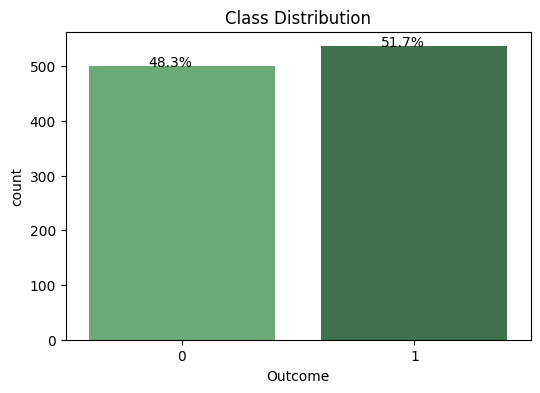

In [46]:
# Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Outcome', data=data_bal, palette = 'Greens_d')
plt.title('Class Distribution')

# Calculate percentages and annotate
total = len(data_bal['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Saving the plot
plt.savefig('pima_class_distribution.png')
plt.show()

In [47]:
x_bal = data_bal.drop('Outcome', axis=1)
y_bal = data_bal['Outcome']

In [48]:
# Split the balanced data into training, validation, and testing sets
x_bal_train, x_bal_temp, y_bal_train, y_bal_temp = train_test_split(x_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)
x_bal_val, x_bal_test, y_bal_val, y_bal_test = train_test_split(x_bal_temp, y_bal_temp, test_size=0.5, stratify=y_bal_temp, random_state=42)

In [49]:
# Normalize the features
x_bal_train_sd = scaler.fit_transform(x_bal_train)
x_bal_val_sd = scaler.transform(x_bal_val)
x_bal_test_sd = scaler.transform(x_bal_test)

### Apply the Dimensionality Reduction Techniques - PCA, LDA, and Autoencoder on Balanced dataset

#### Apply PCA

In [50]:
pca_bal = PCA(n_components=5)

# Fit and transform with PCA
x_bal_train_pca = pca.fit_transform(x_bal_train_sd)
x_bal_val_pca = pca.transform(x_bal_val_sd)
x_bal_test_pca = pca.transform(x_bal_test_sd)


#### Apply LDA

In [51]:
lda_bal = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform with LDA
x_bal_train_lda = lda.fit_transform(x_bal_train_sd, y_bal_train)
x_bal_val_lda = lda.transform(x_bal_val_sd)
x_bal_test_lda = lda.transform(x_bal_test_sd)


#### Apply Autoencoders

In [52]:
# Build and train the autoencoder
autoencoder_bal = build_custom_autoencoder(x_bal_train_sd.shape[1])
autoencoder_bal.fit(x_bal_train_sd, x_bal_train_sd, epochs=30, batch_size=256, validation_data=(x_bal_val_sd, x_bal_val_sd))

Epoch 1/30
4/4 [==============================] - 0s 28ms/step - loss: 1.2697 - val_loss: 1.2995
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 1.2630 - val_loss: 1.2935
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 1.2570 - val_loss: 1.2881
Epoch 4/30
4/4 [==============================] - 0s 8ms/step - loss: 1.2514 - val_loss: 1.2830
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 1.2463 - val_loss: 1.2783
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 1.2413 - val_loss: 1.2738
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 1.2365 - val_loss: 1.2693
Epoch 8/30
4/4 [==============================] - 0s 12ms/step - loss: 1.2317 - val_loss: 1.2648
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 1.2270 - val_loss: 1.2602
Epoch 10/30
4/4 [==============================] - 0s 6ms/step - loss: 1.2221 - val_loss: 1.2554
Epoch 11/30
4/4 [====================

In [53]:
# Define the encoder part (up to the bottleneck layer)
encoder_bal = Model(inputs=autoencoder_bal.input, outputs=autoencoder_bal.layers[1].output)

In [54]:
# Transform the data
x_bal_train_auto = encoder_bal.predict(x_bal_train_sd)
x_bal_val_auto = encoder_bal.predict(x_bal_val_sd)
x_bal_test_auto = encoder_bal.predict(x_bal_test_sd)


4/4 [==============================] - 0s 0s/step


# Step 3: Run models on each transformation for balanced dataset

In [55]:
### Train models on transformed datasets and store results
transformations = ['Bal_data', 'PCA_balanced', 'LDA_balanced', 'Autoencoder_balanced']
datasets = {
    'Bal_data': (x_bal_train_sd, x_bal_val_sd, x_bal_test_sd),
    'PCA_balanced': (x_bal_train_pca, x_bal_val_pca, x_bal_test_pca),
    'LDA_balanced': (x_bal_train_lda, x_bal_val_lda, x_bal_test_lda),
    'Autoencoder_balanced': (x_bal_train_auto, x_bal_val_auto, x_bal_test_auto)
}

results_bal = {}
reports_bal = {}
predictions_bal = {}

# Training and evaluating models
for transformation in transformations:
    X_train_t, X_val_t, X_test_t = datasets[transformation]

    for name, model in models.items():
        key = f"{name}_{transformation}"
        result, report, pred = train_and_evaluate(model, X_train_t, y_bal_train, X_val_t, y_bal_val, X_test_t, y_bal_test)
        results_bal[key] = result
        reports_bal[key] = report
        predictions_bal[key] = pred
        
        # Save each model with a unique filename
        save_model(model, f"{key}.pkl")

### Generate and display results

In [56]:
# Generating DataFrame for results
all_results_bal_df = pd.concat(results_bal, axis=0)
all_results_bal_df

train_accuracy  train_recall  \
Logistic Regression_Bal_data             0        0.758454      0.721963   
Random Forest_Bal_data                   0        0.888889      0.943925   
MLP_Bal_data                             0        0.876812      0.904206   
XGBoost_Bal_data                         0        1.000000      1.000000   
Stacking_Bal_data                        0        1.000000      1.000000   
Logistic Regression_PCA_balanced         0        0.730676      0.710280   
Random Forest_PCA_balanced               0        0.876812      0.967290   
MLP_PCA_balanced                         0        0.807971      0.864486   
XGBoost_PCA_balanced                     0        1.000000      1.000000   
Stacking_PCA_balanced                    0        0.998792      0.997664   
Logistic Regression_LDA_balanced         0        0.752415      0.712617   
Random Forest_LDA_balanced               0        0.836957      0.894860   
MLP_LDA_balanced                         0        0.763285      0.808411   
XGBoost_LDA_balanced                     0        0.845411      0.880841   
Stacking_LDA_balanced                    0        0.903382      0.918224   
Logistic Regression_Autoencoder_balanced 0        0.741546      0.733645   
Random Forest_Autoencoder_balanced       0        0.859903      0.859813   
MLP_Autoencoder_balanced                 0        0.792271      0.836449   
XGBoost_Autoencoder_balanced             0        0.998792      0.997664   
Stacking_Autoencoder_balanced            0        1.000000      1.000000   

                                            train_precision  val_accuracy  \
Logistic Regression_Bal_data             0         0.792308      0.750000   
Random Forest_Bal_data                   0         0.855932      0.855769   
MLP_Bal_data                             0         0.863839      0.798077   
XGBoost_Bal_data                         0         1.000000      0.884615   
Stacking_Bal_data                        0         1.000000      0.894231   
Logistic Regression_PCA_balanced         0         0.754342      0.692308   
Random Forest_PCA_balanced               0         0.824701      0.788462   
MLP_PCA_balanced                         0         0.785563      0.759615   
XGBoost_PCA_balanced                     0         1.000000      0.875000   
Stacking_PCA_balanced                    0         1.000000      0.865385   
Logistic Regression_LDA_balanced         0         0.788114      0.769231   
Random Forest_LDA_balanced               0         0.809725      0.759615   
MLP_LDA_balanced                         0         0.752174      0.759615   
XGBoost_LDA_balanced                     0         0.830396      0.759615   
Stacking_LDA_balanced                    0         0.897260      0.788462   
Logistic Regression_Autoencoder_balanced 0         0.758454      0.721154   
Random Forest_Autoencoder_balanced       0         0.867925      0.769231   
MLP_Autoencoder_balanced                 0         0.778261      0.721154   
XGBoost_Autoencoder_balanced             0         1.000000      0.846154   
Stacking_Autoencoder_balanced            0         1.000000      0.884615   

                                            val_recall  val_precision  \
Logistic Regression_Bal_data             0    0.722222       0.780000   
Random Forest_Bal_data                   0    0.907407       0.830508   
MLP_Bal_data                             0    0.851852       0.779661   
XGBoost_Bal_data                         0    1.000000       0.818182   
Stacking_Bal_data                        0    0.981481       0.841270   
Logistic Regression_PCA_balanced         0    0.666667       0.720000   
Random Forest_PCA_balanced               0    0.907407       0.742424   
MLP_PCA_balanced                         0    0.870370       0.723077   
XGBoost_PCA_balanced                     0    0.981481       0.815385   
Stacking_PCA_balanced                    0    0.981481       0.803030   
Logistic Regression_LDA_ba

After applying simple random oversampling to balance the Pima dataset, all models showed improved performance across training and testing phases, with Stacking Classifier (SC) and XGBoost models exhibiting particularly high training accuracies and AUC scores. Notably, SC achieved near-perfect training accuracy with balanced data and maintained high performance in testing, reflected by AUC scores close to 0.92. The balancing of classes evidently helped mitigate the poor performance initially observed with imbalanced data, leading to a better generalization in test scenarios.

In [57]:
# Print classification reports
for key, report in reports_bal.items():
    print(f"Classification Report for {key}:\n{report}\n")
    print("-" * 50)  # Print dashes for separation

Classification Report for Logistic Regression_Bal_data:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        50
           1       0.78      0.70      0.74        54

    accuracy                           0.74       104
   macro avg       0.74      0.74      0.74       104
weighted avg       0.74      0.74      0.74       104


--------------------------------------------------
Classification Report for Random Forest_Bal_data:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        50
           1       0.78      0.91      0.84        54

    accuracy                           0.82       104
   macro avg       0.83      0.81      0.81       104
weighted avg       0.83      0.82      0.82       104


--------------------------------------------------
Classification Report for MLP_Bal_data:
              precision    recall  f1-score   support

           0       0.84      0.76      0.

### Confusion Matrices

Confusion matrix illustrates a thorough breakdown of the model’s prediction distribution across actual classes, revealing instances of correct and incorrect classifications.

In [58]:
# Function for confusion matrices

def plot_confusion_matrices(predictions, y_test, nrows, ncols, title, filename):
    num_models = len(predictions)
    if nrows * ncols < num_models:
        raise ValueError("Number of subplots is less than the number of models")

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 30))  # Adjust the figsize as needed
    fig.suptitle(title, fontsize=20)

    model_names = list(predictions.keys())
    for idx, model_name in enumerate(model_names):
        ax = axes[idx // ncols, idx % ncols]
        cm = confusion_matrix(y_test, predictions[model_name]['y_pred_test'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(model_name, fontsize=14)
        ax.set_xlabel('Predicted', fontsize=10)
        ax.set_ylabel('True', fontsize=10)

    # If there are any empty subplots, hide them
    for i in range(num_models, nrows * ncols):
        axes.flatten()[i].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

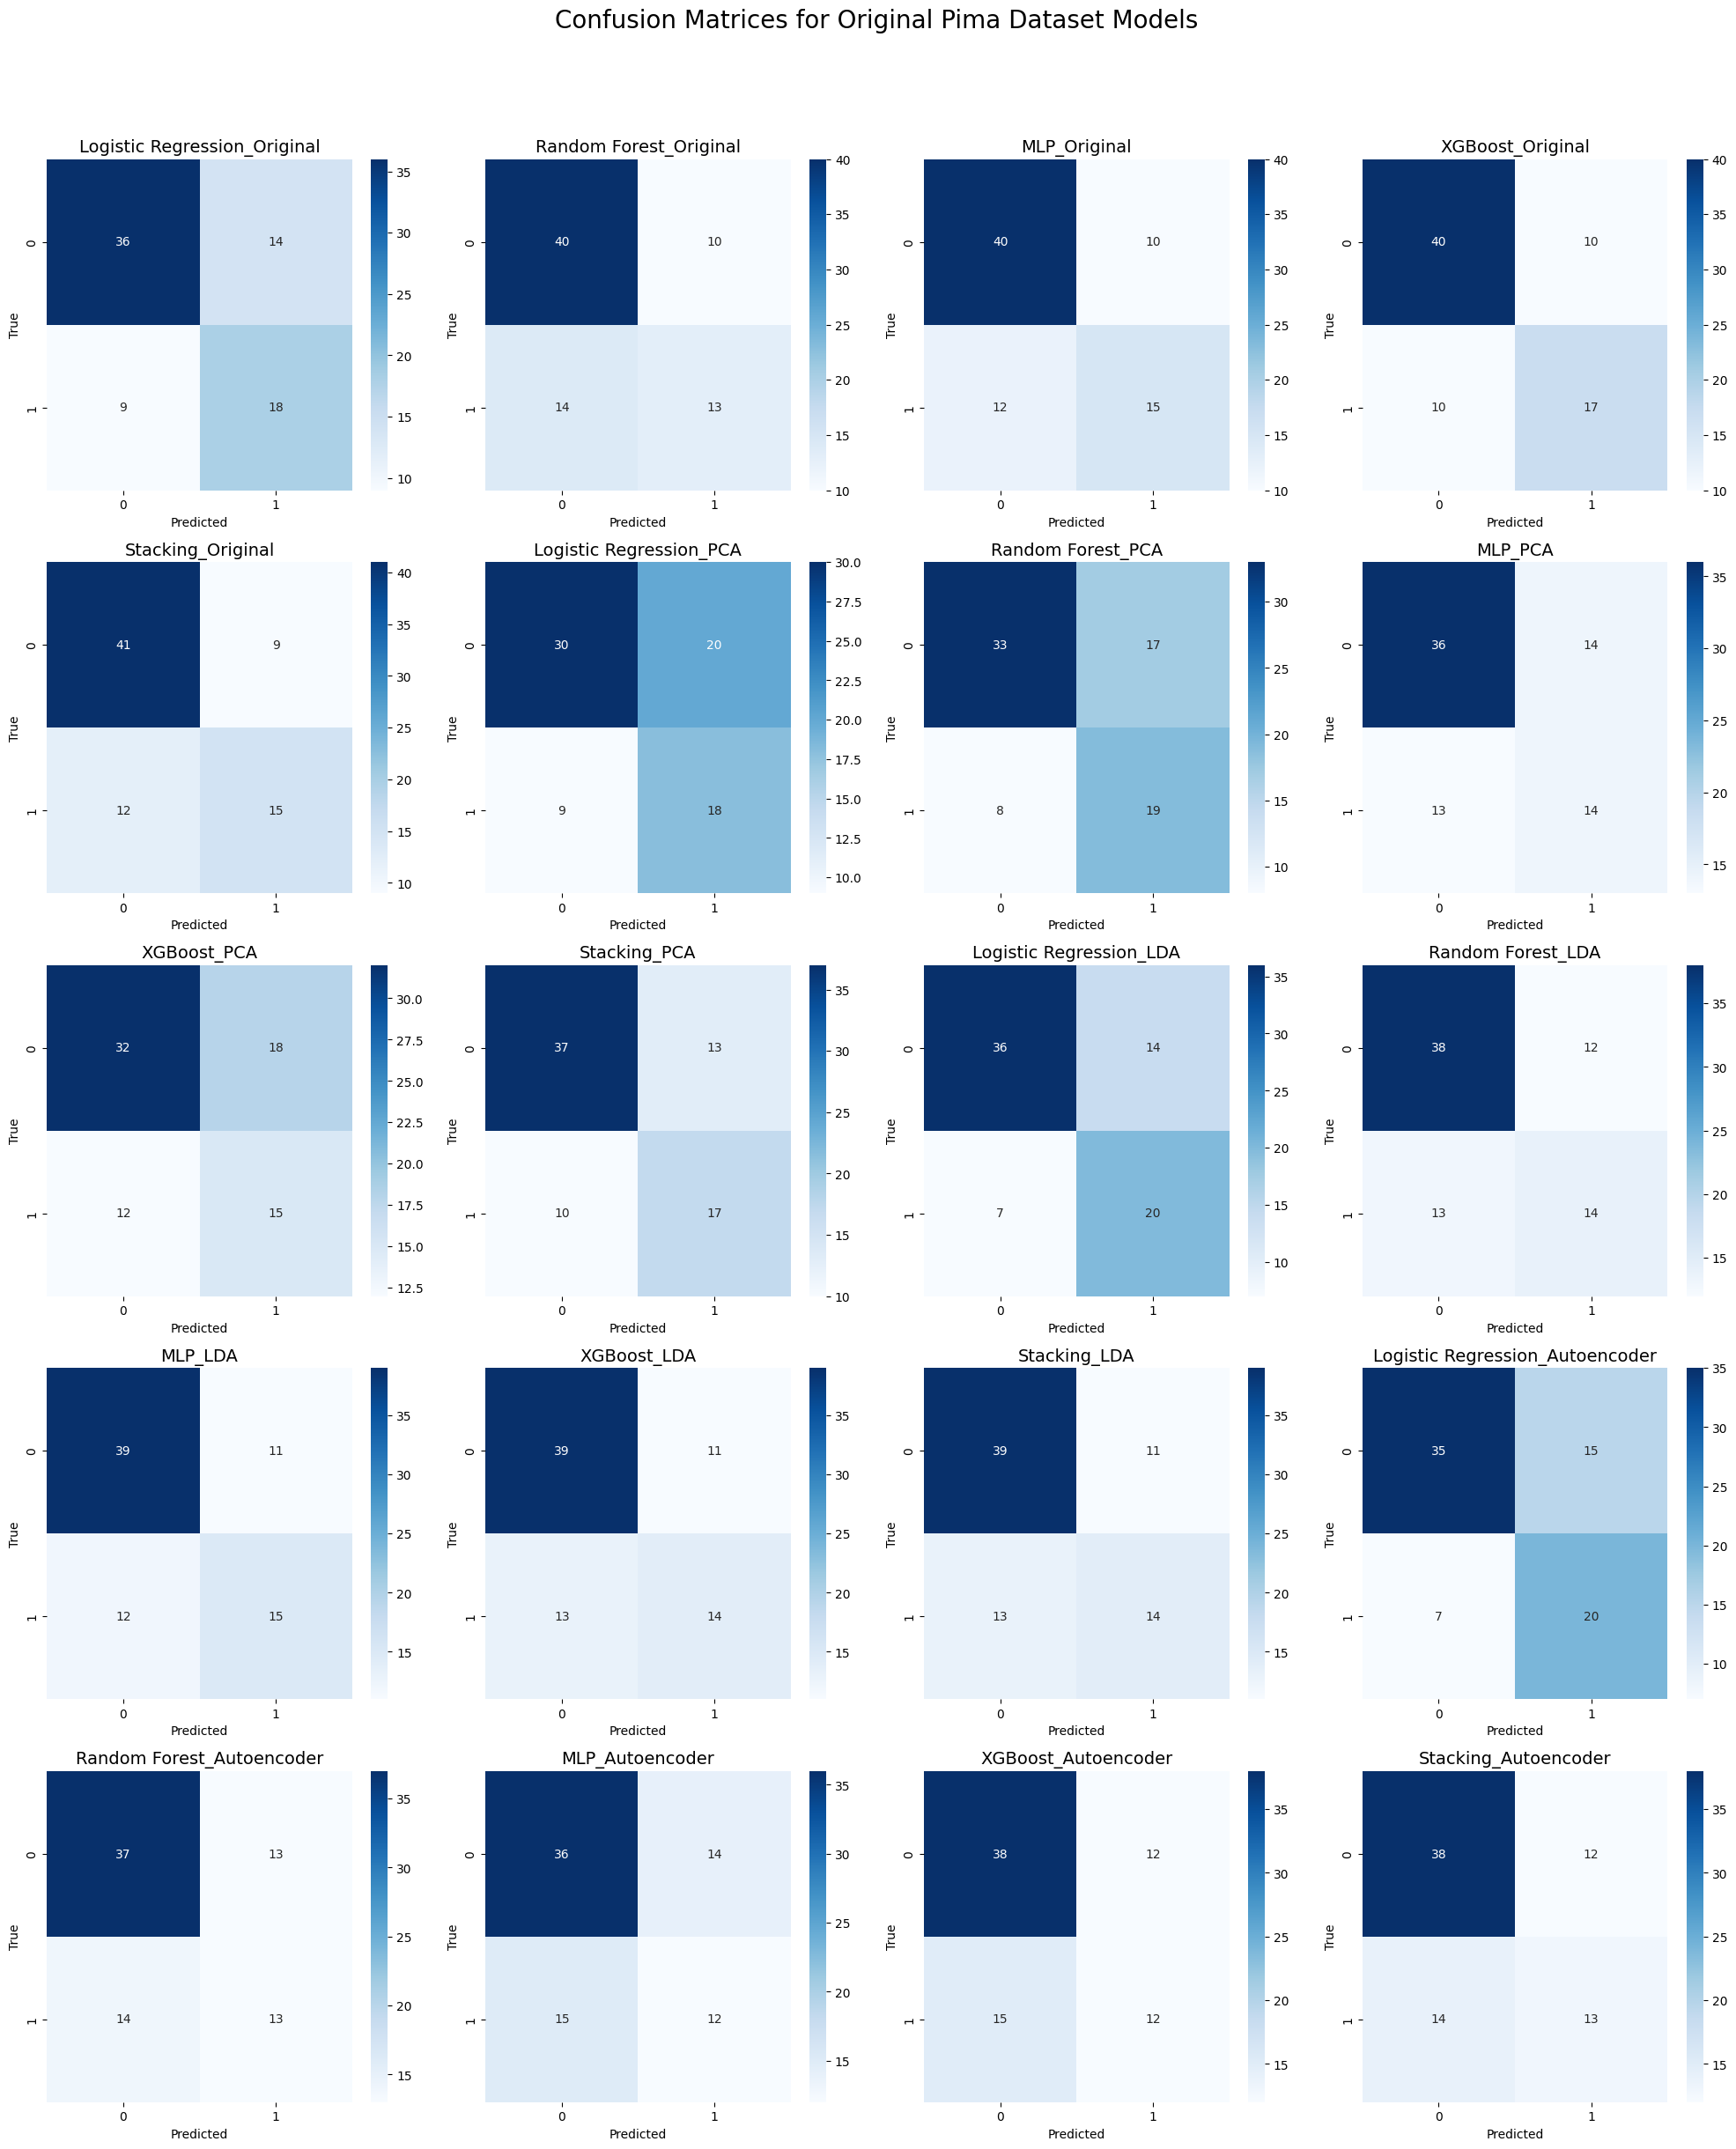

In [59]:
### Confusion Matices for Original Dataset
nrows, ncols = 6, 4
plot_confusion_matrices(predictions, y_test, nrows, ncols, "Confusion Matrices for Original Pima Dataset Models", "confusion_matrices_pima_original_models.png")


The confusion matrices for the original Pima dataset reflect the performance of various models before balancing. Most models show a tendency to predict the majority class (0) more frequently than the minority class (1), as indicated by higher values in the top-left quadrant (true negatives) compared to the bottom-right quadrant (true positives). This suggests a challenge in correctly identifying the minority class, likely due to the imbalanced nature of the dataset. The misclassification rate (false positives and false negatives) varies across models

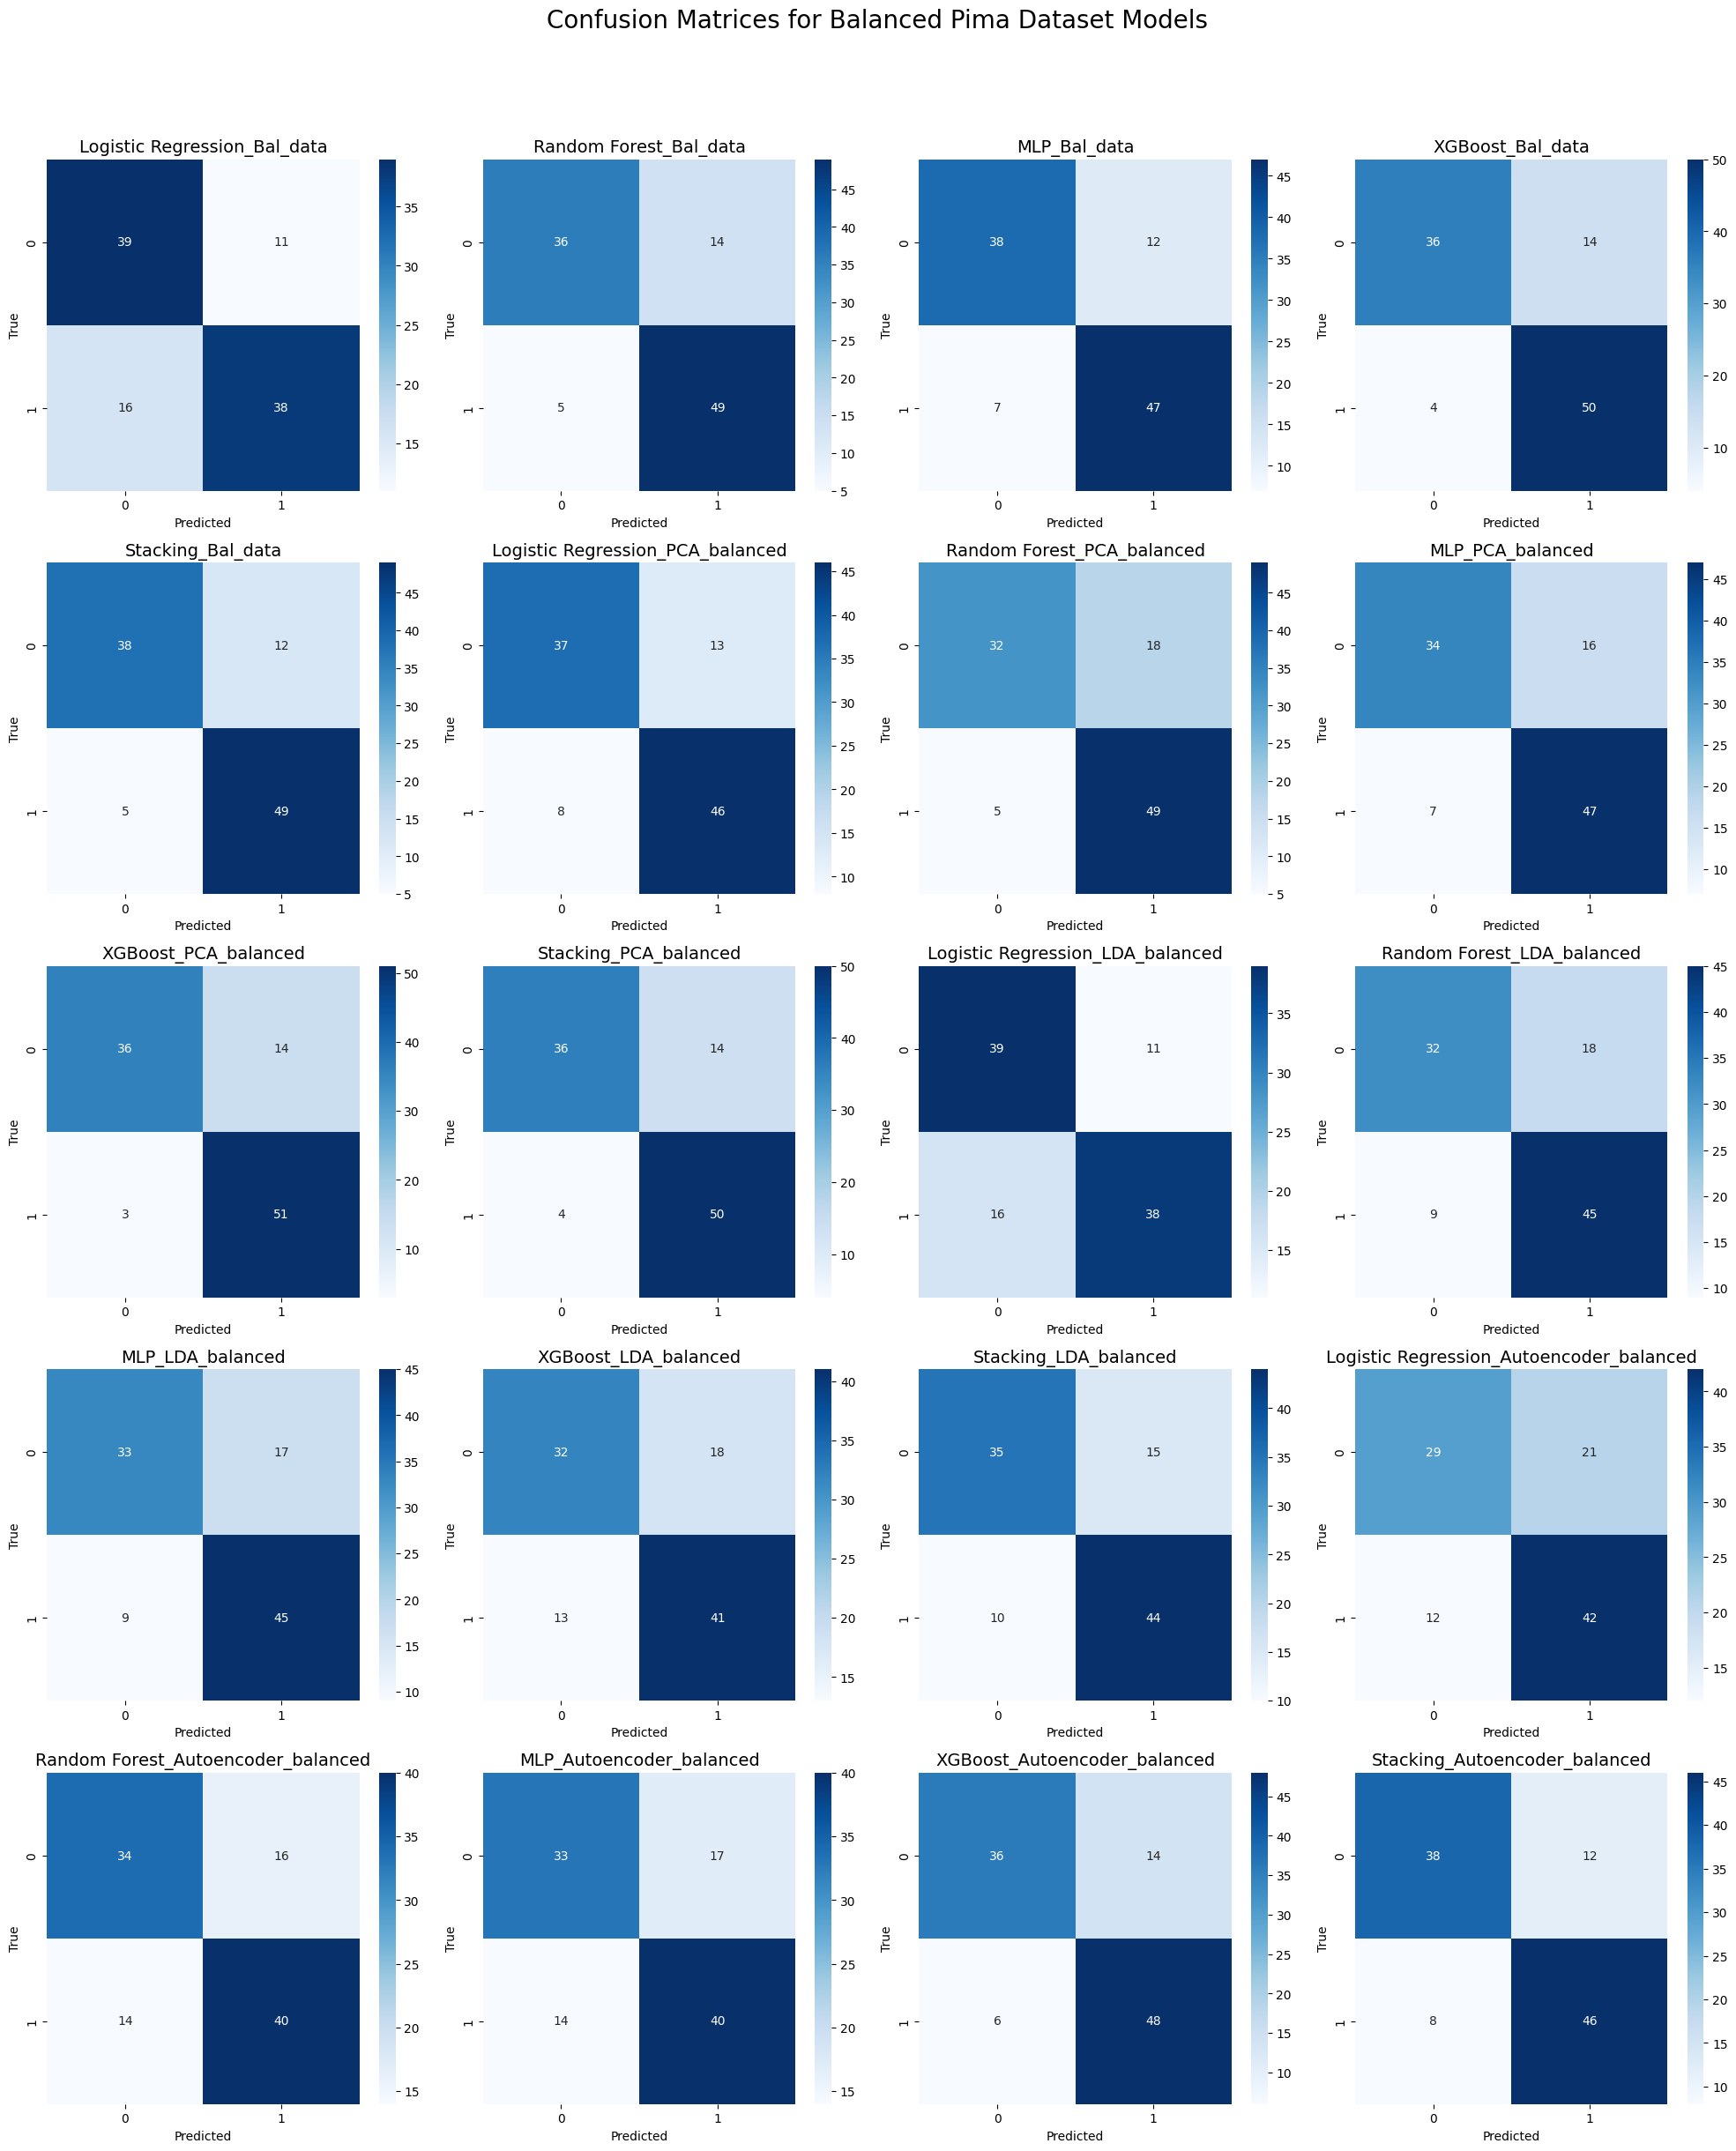

In [60]:
### Confusion Matices for Balanced Dataset
nrows_balanced, ncols_balanced = 6, 4
# Plot and save confusion matrices for balanced dataset
plot_confusion_matrices(predictions_bal, y_bal_test, nrows_balanced, ncols_balanced, "Confusion Matrices for Balanced Pima Dataset Models", "confusion_matrices_pima_balanced.png")

The dataset, the confusion matrices reflect a general improvement in model performance after balancing the dataset. Models like Stacking Classifier and Random Forest show a substantial increase in correctly predicting true positives without a significant increase in false positives, indicating better handling of the previously imbalanced data. The improved true positive rates suggest that balancing the dataset has made a positive impact on model sensitivity.

### ROC Curves

Receiver Operating Characteristic curves (ROC Curves), are graphical representations used to evaluate the diagnostic ability of a binary classifier system as its discrimination threshold is varied. They are created by plotting the true positive rate (TPR), also known as sensitivity, against the false positive rate (FPR).

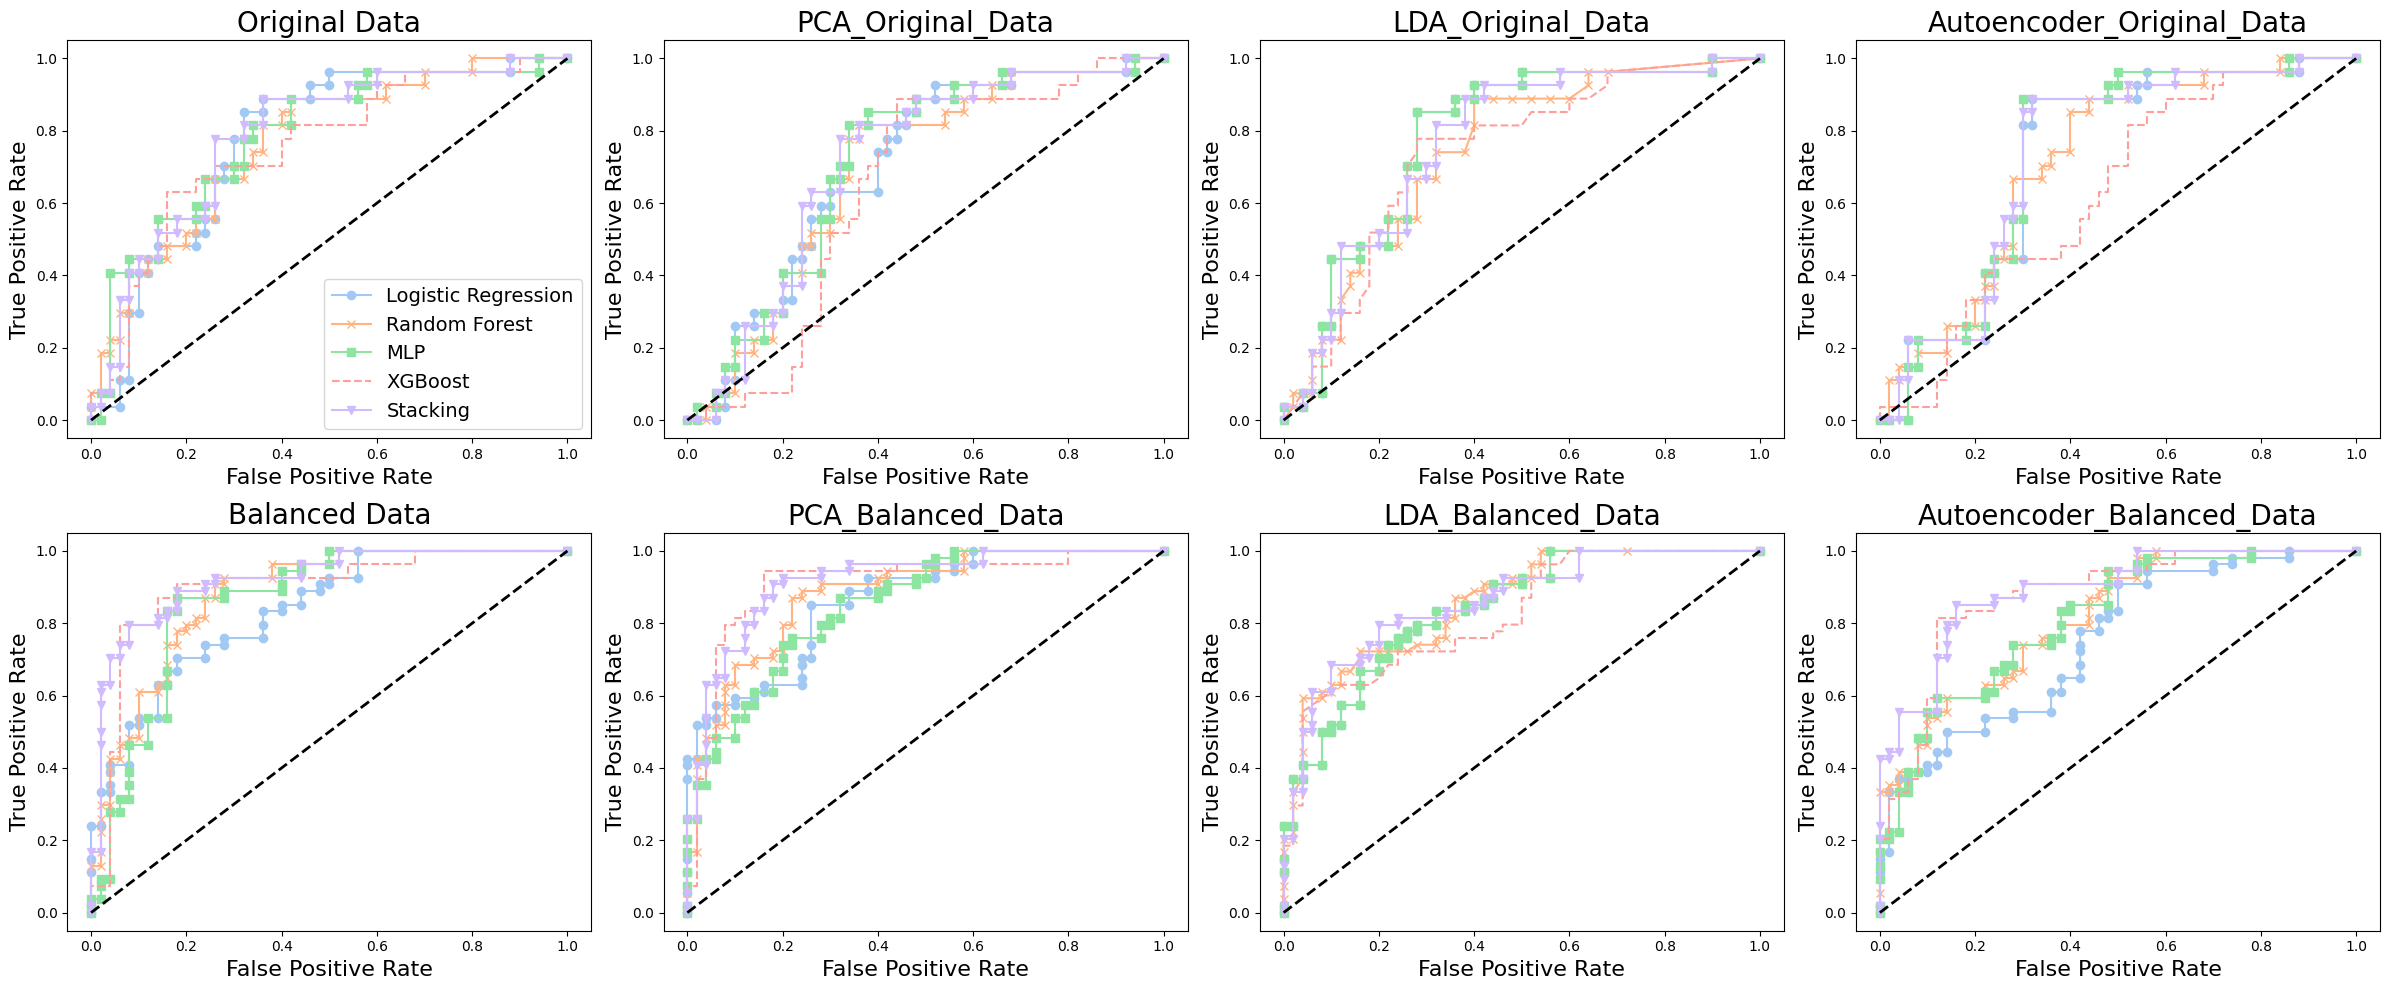

In [61]:
# Filter predictions for original and transformed datasets
original_predictions = {k: v for k, v in predictions.items() if 'Original' in k}
pca_predictions = {k: v for k, v in predictions.items() if 'PCA' in k}
lda_predictions = {k: v for k, v in predictions.items() if 'LDA' in k}
autoencoder_predictions = {k: v for k, v in predictions.items() if 'Autoencoder' in k}

# Filter predictions for balanced and transformed datasets
balanced_original_predictions = {k: v for k, v in predictions_bal.items() if 'Bal_data' in k}
balanced_pca_predictions = {k: v for k, v in predictions_bal.items() if 'PCA_balanced' in k}
balanced_lda_predictions = {k: v for k, v in predictions_bal.items() if 'LDA_balanced' in k}
balanced_autoencoder_predictions = {k: v for k, v in predictions_bal.items() if 'Autoencoder_balanced' in k}

# Prepare the data for plotting
predictions_dict_list = [
    original_predictions, pca_predictions, lda_predictions, autoencoder_predictions,
    balanced_original_predictions, balanced_pca_predictions, balanced_lda_predictions, balanced_autoencoder_predictions
]
y_true_list = [y_test] * 4 + [y_bal_test] * 4
titles = [
    "Original Data", "PCA_Original_Data", "LDA_Original_Data", "Autoencoder_Original_Data",
    "Balanced Data", "PCA_Balanced_Data", "LDA_Balanced_Data", "Autoencoder_Balanced_Data"
]
# Different markers for each model
markers = ['o-', 'x-', 's-', '--', 'v-', '^-', '<-', '>-']  

# Define the plotting function
def plot_combined_roc_curves_subplots(predictions_dict_list, y_true_list, titles, nrows, ncols, filename, markers):
    num_plots = len(predictions_dict_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))

    for i in range(num_plots):
        ax = axes.flatten()[i] if nrows * ncols > 1 else axes
        ax.set_title(titles[i], fontsize=20)
        ax.set_xlabel('False Positive Rate', fontsize=16)
        ax.set_ylabel('True Positive Rate', fontsize=16)

        for (model_name, pred), marker in zip(predictions_dict_list[i].items(), markers):
            if 'y_pred_proba_test' in pred:
                fpr, tpr, _ = roc_curve(y_true_list[i], pred['y_pred_proba_test'])
                #roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, marker, label=f'{model_name.split("_")[0]}')

        ax.plot([0, 1], [0, 1], 'k--', lw = 2)  # Reference line
        if i == 0:
            ax.legend(loc='lower right', fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Plot and save ROC curves for original and balanced datasets
plot_combined_roc_curves_subplots(
    predictions_dict_list, y_true_list, titles, 
    nrows=2, ncols=4, filename="pima_roc_curves_combined_subplot.png", markers=markers
)


The ROC curves indicate that models generally performed better on balanced data compared to the original dataset. The Area Under the Curve (AUC) values for models on the original data hovered around 0.8, indicating a good but not optimal ability to distinguish between the classes. However, balancing the data significantly improved model performance, with some models like Stacking and XGBoost achieving AUC values close to 1.0, which suggests an excellent predictive performance with high true positive rates and low false positive rates

### Precision - Recall Curves

Precision-Recall (PR) curves, plot the precision of a classifier against its recall (true positive rate) at different thresholds.PR curves give a more informative picture of an algorithm’s performance when the classes are very imbalanced.

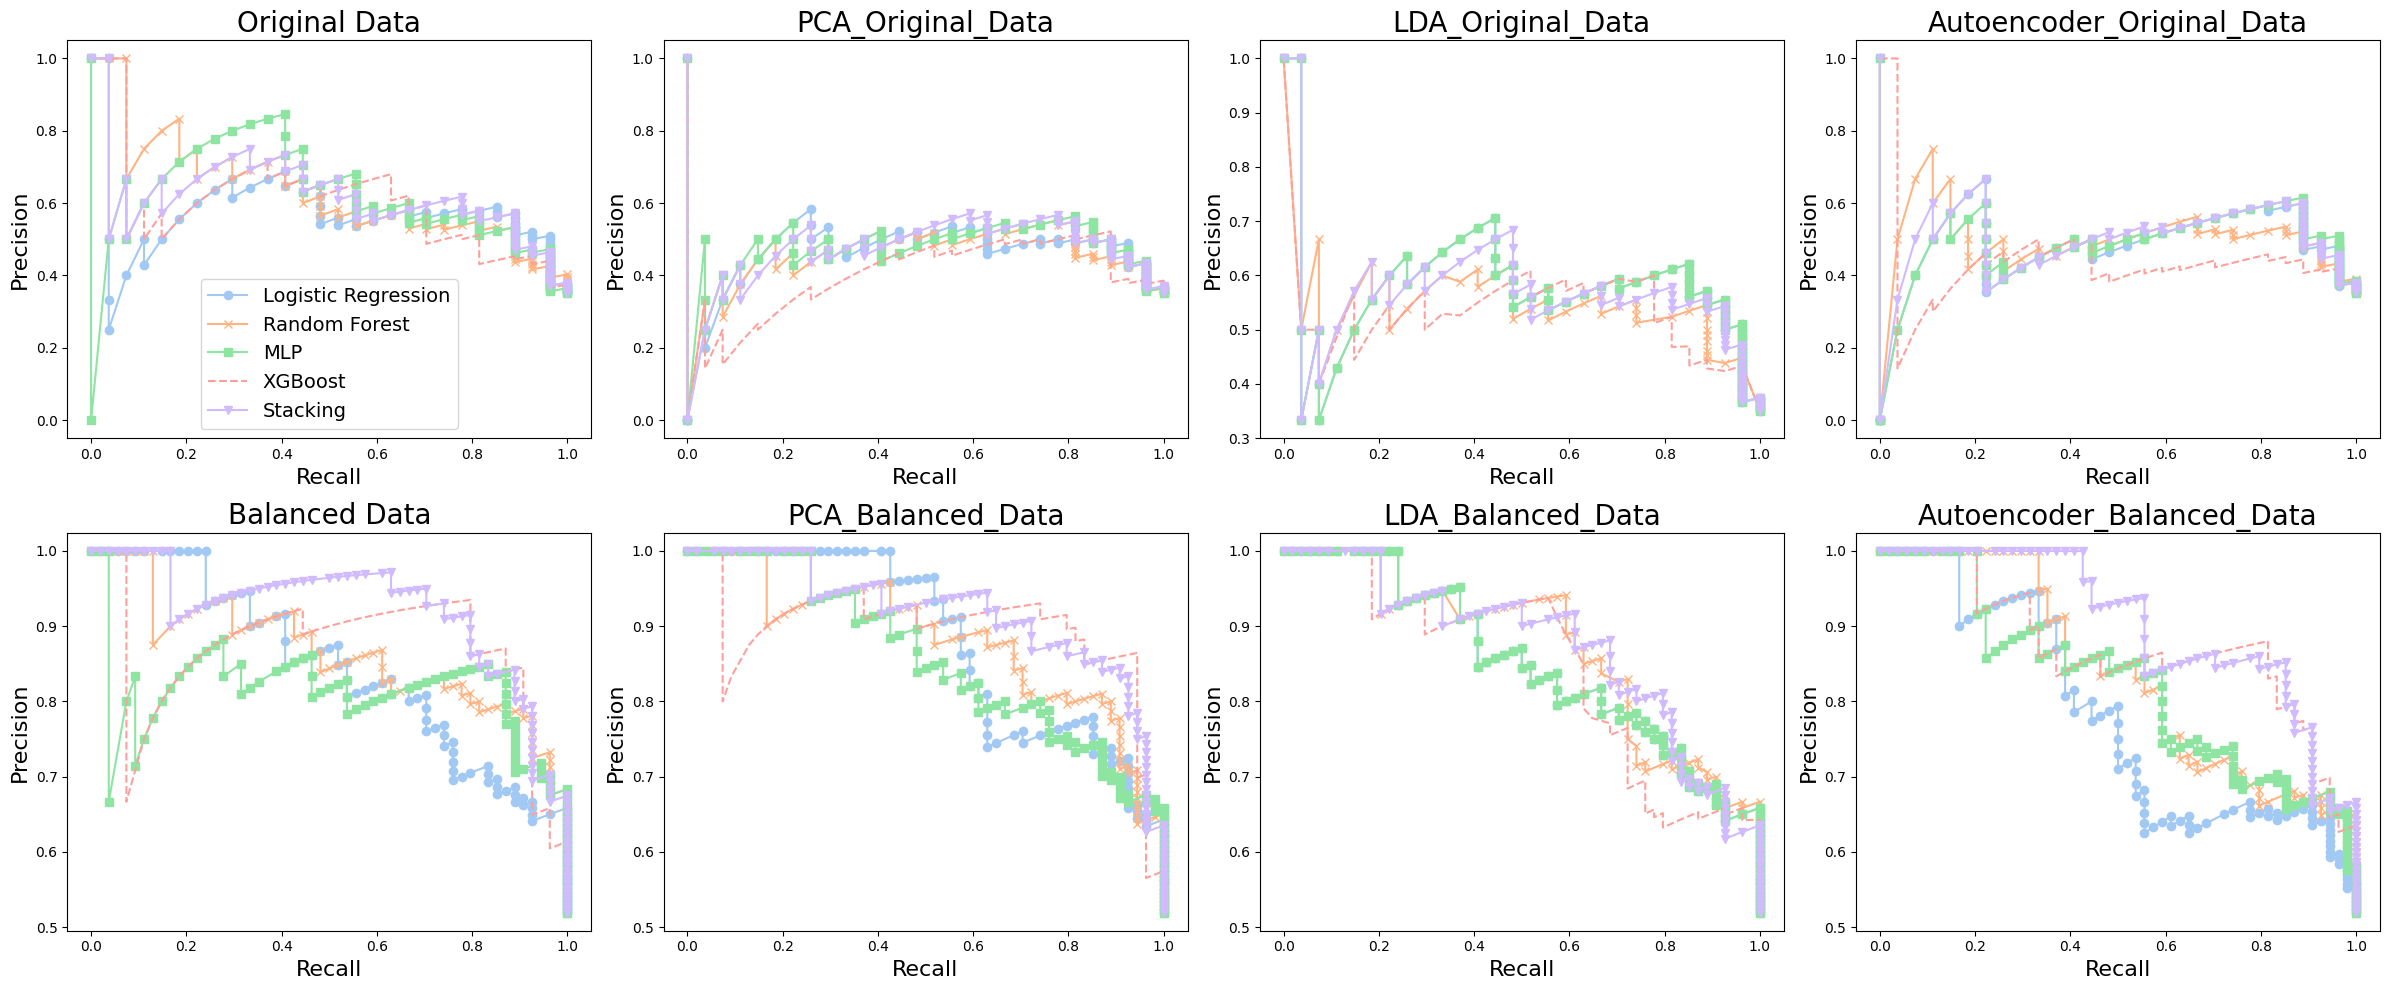

In [62]:
def plot_combined_precision_recall_curves_subplots(predictions_dict_list, y_true_list, titles, nrows, ncols, filename, markers, line_width=2):
    num_plots = len(predictions_dict_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))

    for i in range(num_plots):
        ax = axes.flatten()[i] if nrows * ncols > 1 else axes
        ax.set_title(titles[i],  fontsize=20)
        ax.set_xlabel('Recall', fontsize=16)
        ax.set_ylabel('Precision', fontsize=16)

        for (model_name, pred), marker in zip(predictions_dict_list[i].items(), markers):
            if 'y_pred_proba_test' in pred:
                precision, recall, _ = precision_recall_curve(y_true_list[i], pred['y_pred_proba_test'])
                # pr_auc = auc(recall, precision)
                ax.plot(recall, precision, marker, label=f'{model_name.split("_")[0]}')
                
        # Add legend to first plot only
        if i ==0:
            ax.legend(loc='best', fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Prepare the titles for Precision-Recall curves
titles = [
    "Original Data", "PCA_Original_Data", "LDA_Original_Data", "Autoencoder_Original_Data",
    "Balanced Data", "PCA_Balanced_Data", "LDA_Balanced_Data", "Autoencoder_Balanced_Data"
]

# Plot and save Precision-Recall curves for original and balanced datasets
plot_combined_precision_recall_curves_subplots(
    predictions_dict_list, y_true_list, titles, 
    nrows=2, ncols=4, filename="pima_precision_recall_curves_combined_subplot.png", markers=markers
) #, line_width=2


There is an evident improvement in precision across most models on the balanced data, with particularly high AUC scores for the Stacking Classifier and XGBoost, indicating they maintain high precision as they capture more true positives

### Learning Curves

Learning curves are a graphical representation of the change in learning performance over time, usually visualized by plotting the training and validation metrics as a function of the number of training instances or epochs. They are helpful for diagnosing the behavior of machine learning models as they learn from increasing amounts of data.

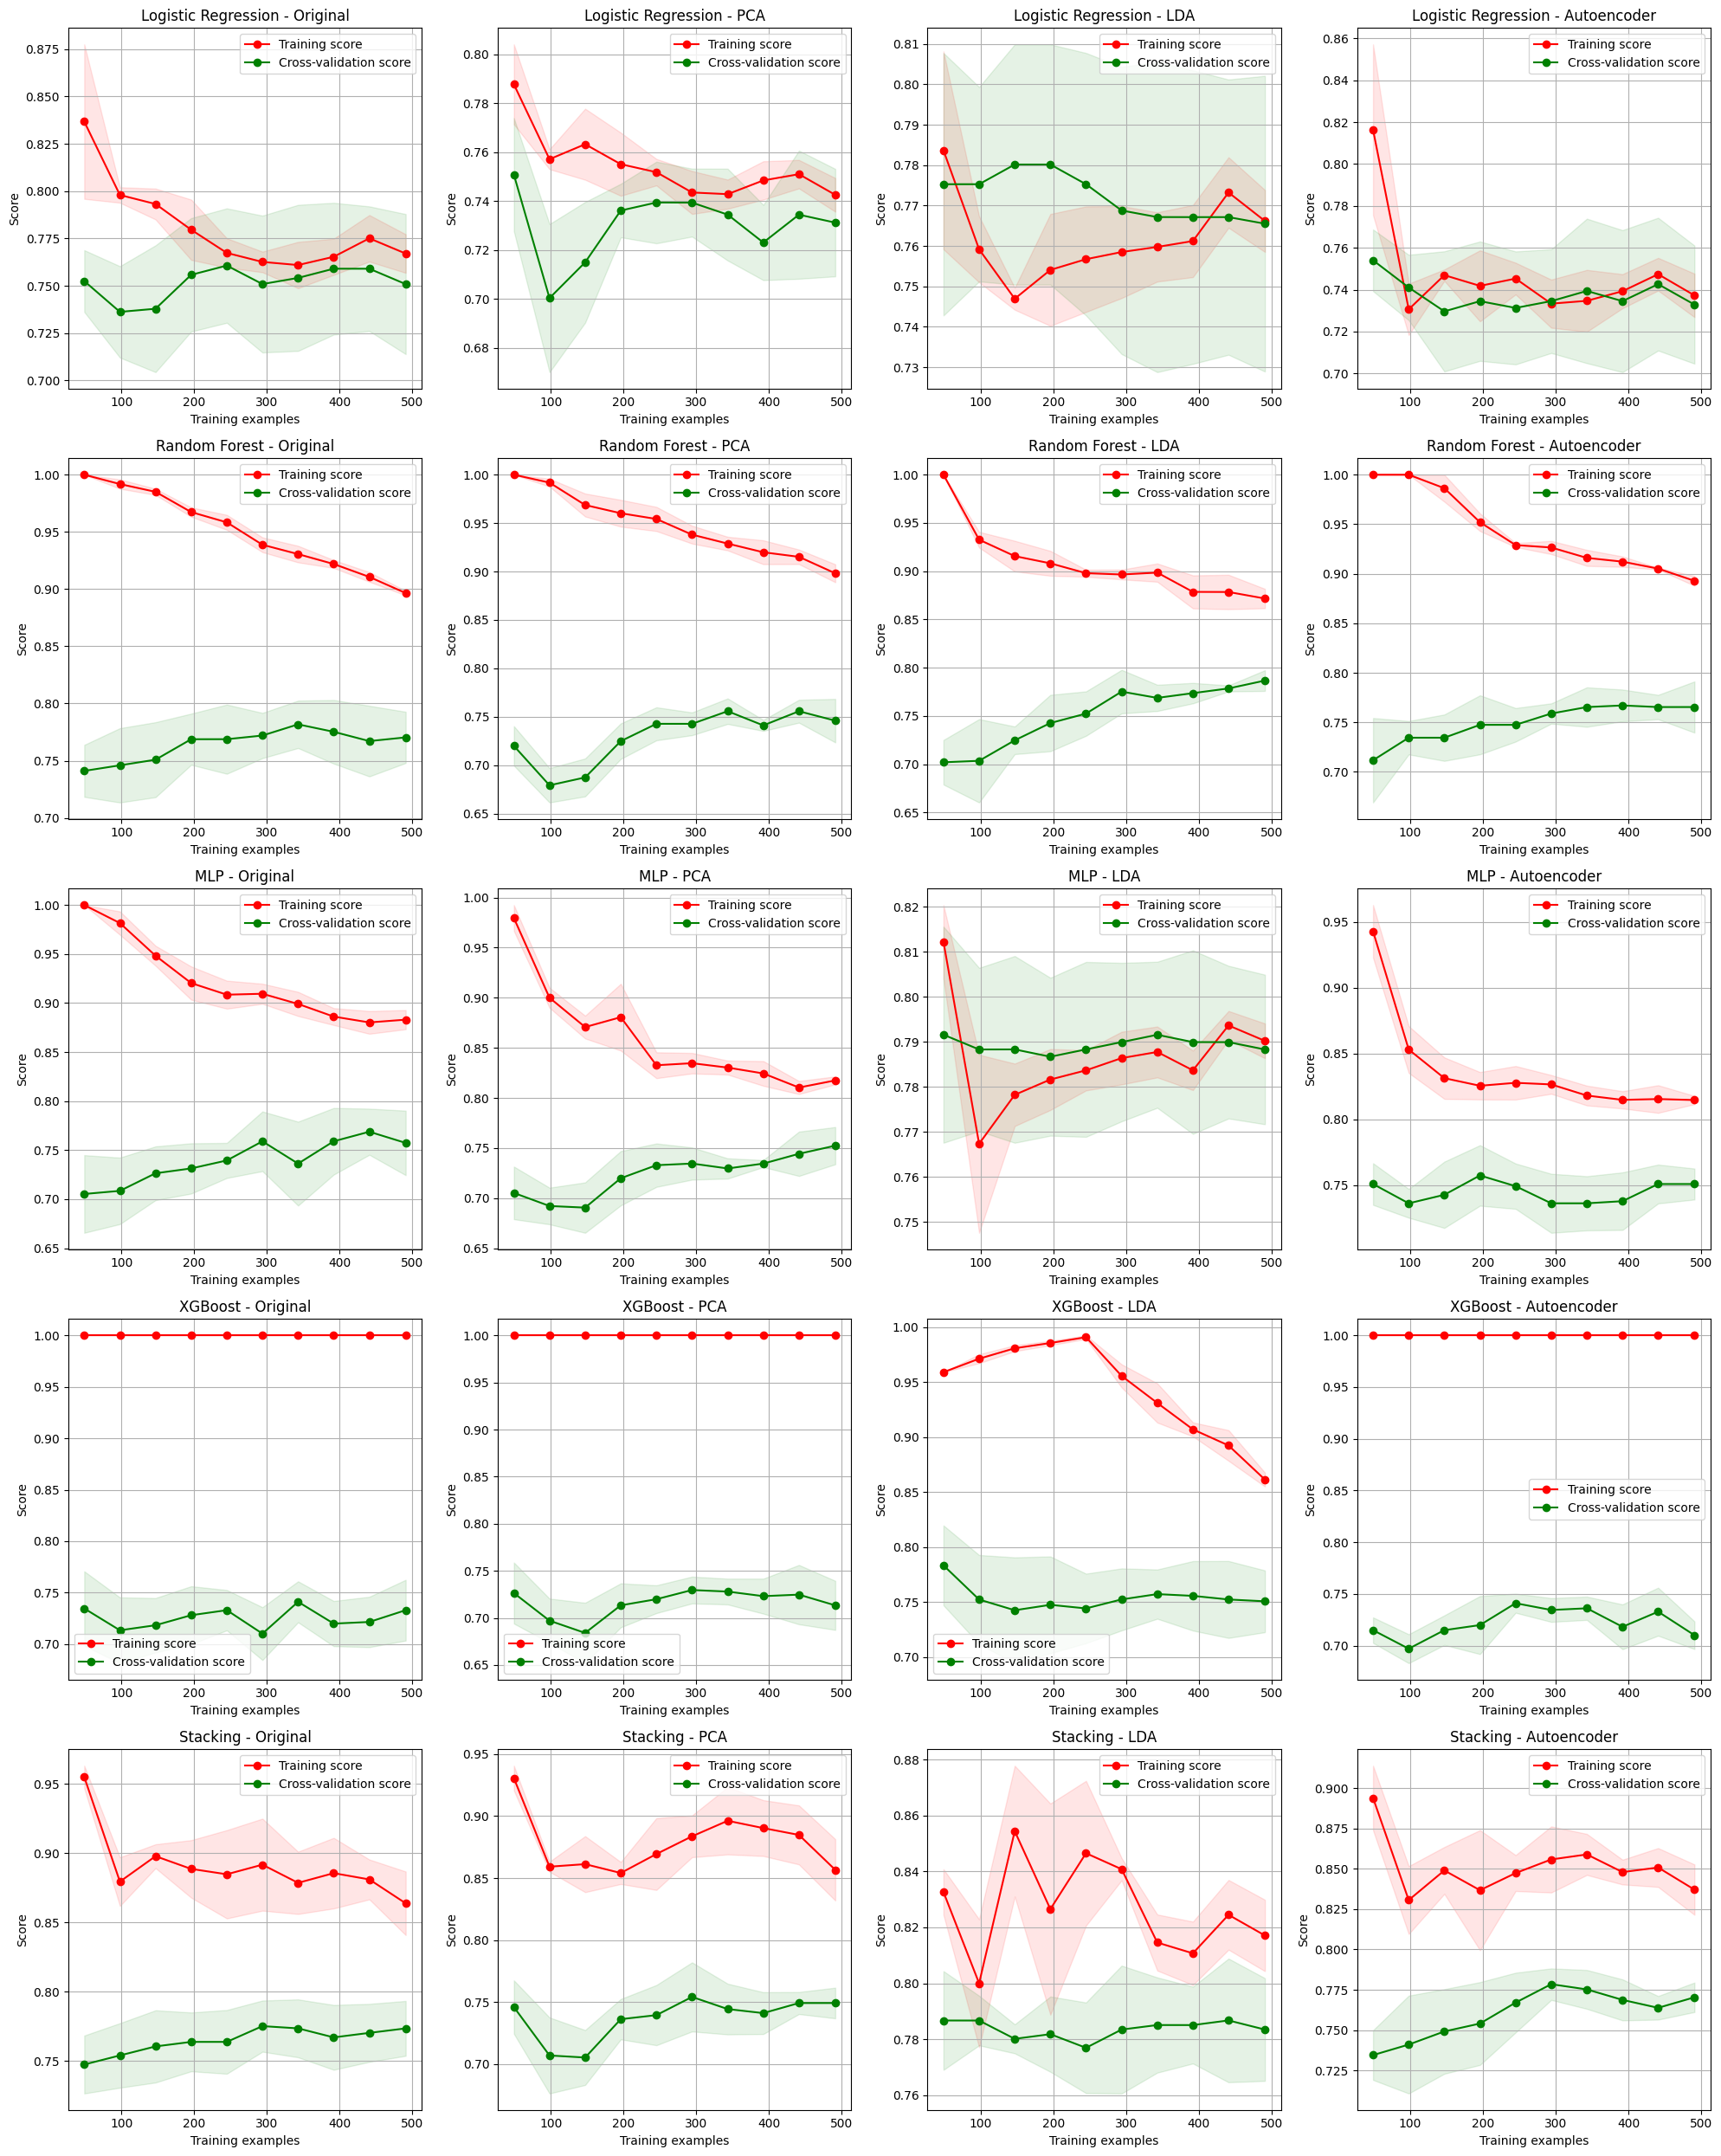

In [64]:
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=0, class_weight='balanced', solver="liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=0, max_depth=6),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss'),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier())])
}
 
def plot_learning_curve(model, X, y, title, ax):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
 
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
 
    ax.set_title(title)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.legend(loc="best")
 
 
# Assign datasets for original transformations
original_datasets = {
    'Original': (x_train_sd, y_train),
    'PCA': (X_train_pca, y_train),
    'LDA': (X_train_lda, y_train),
    'Autoencoder': (X_train_auto_imbal, y_train)
}
 
# Prepare the layout for the subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot learning curves for original datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in original_datasets.items():
        title = f"{model_name} - {transformation_name}"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index])
        ax_index += 1
        
 
plt.tight_layout()
plt.savefig('original_datasets_learning_curves.png', dpi=300)
plt.show()

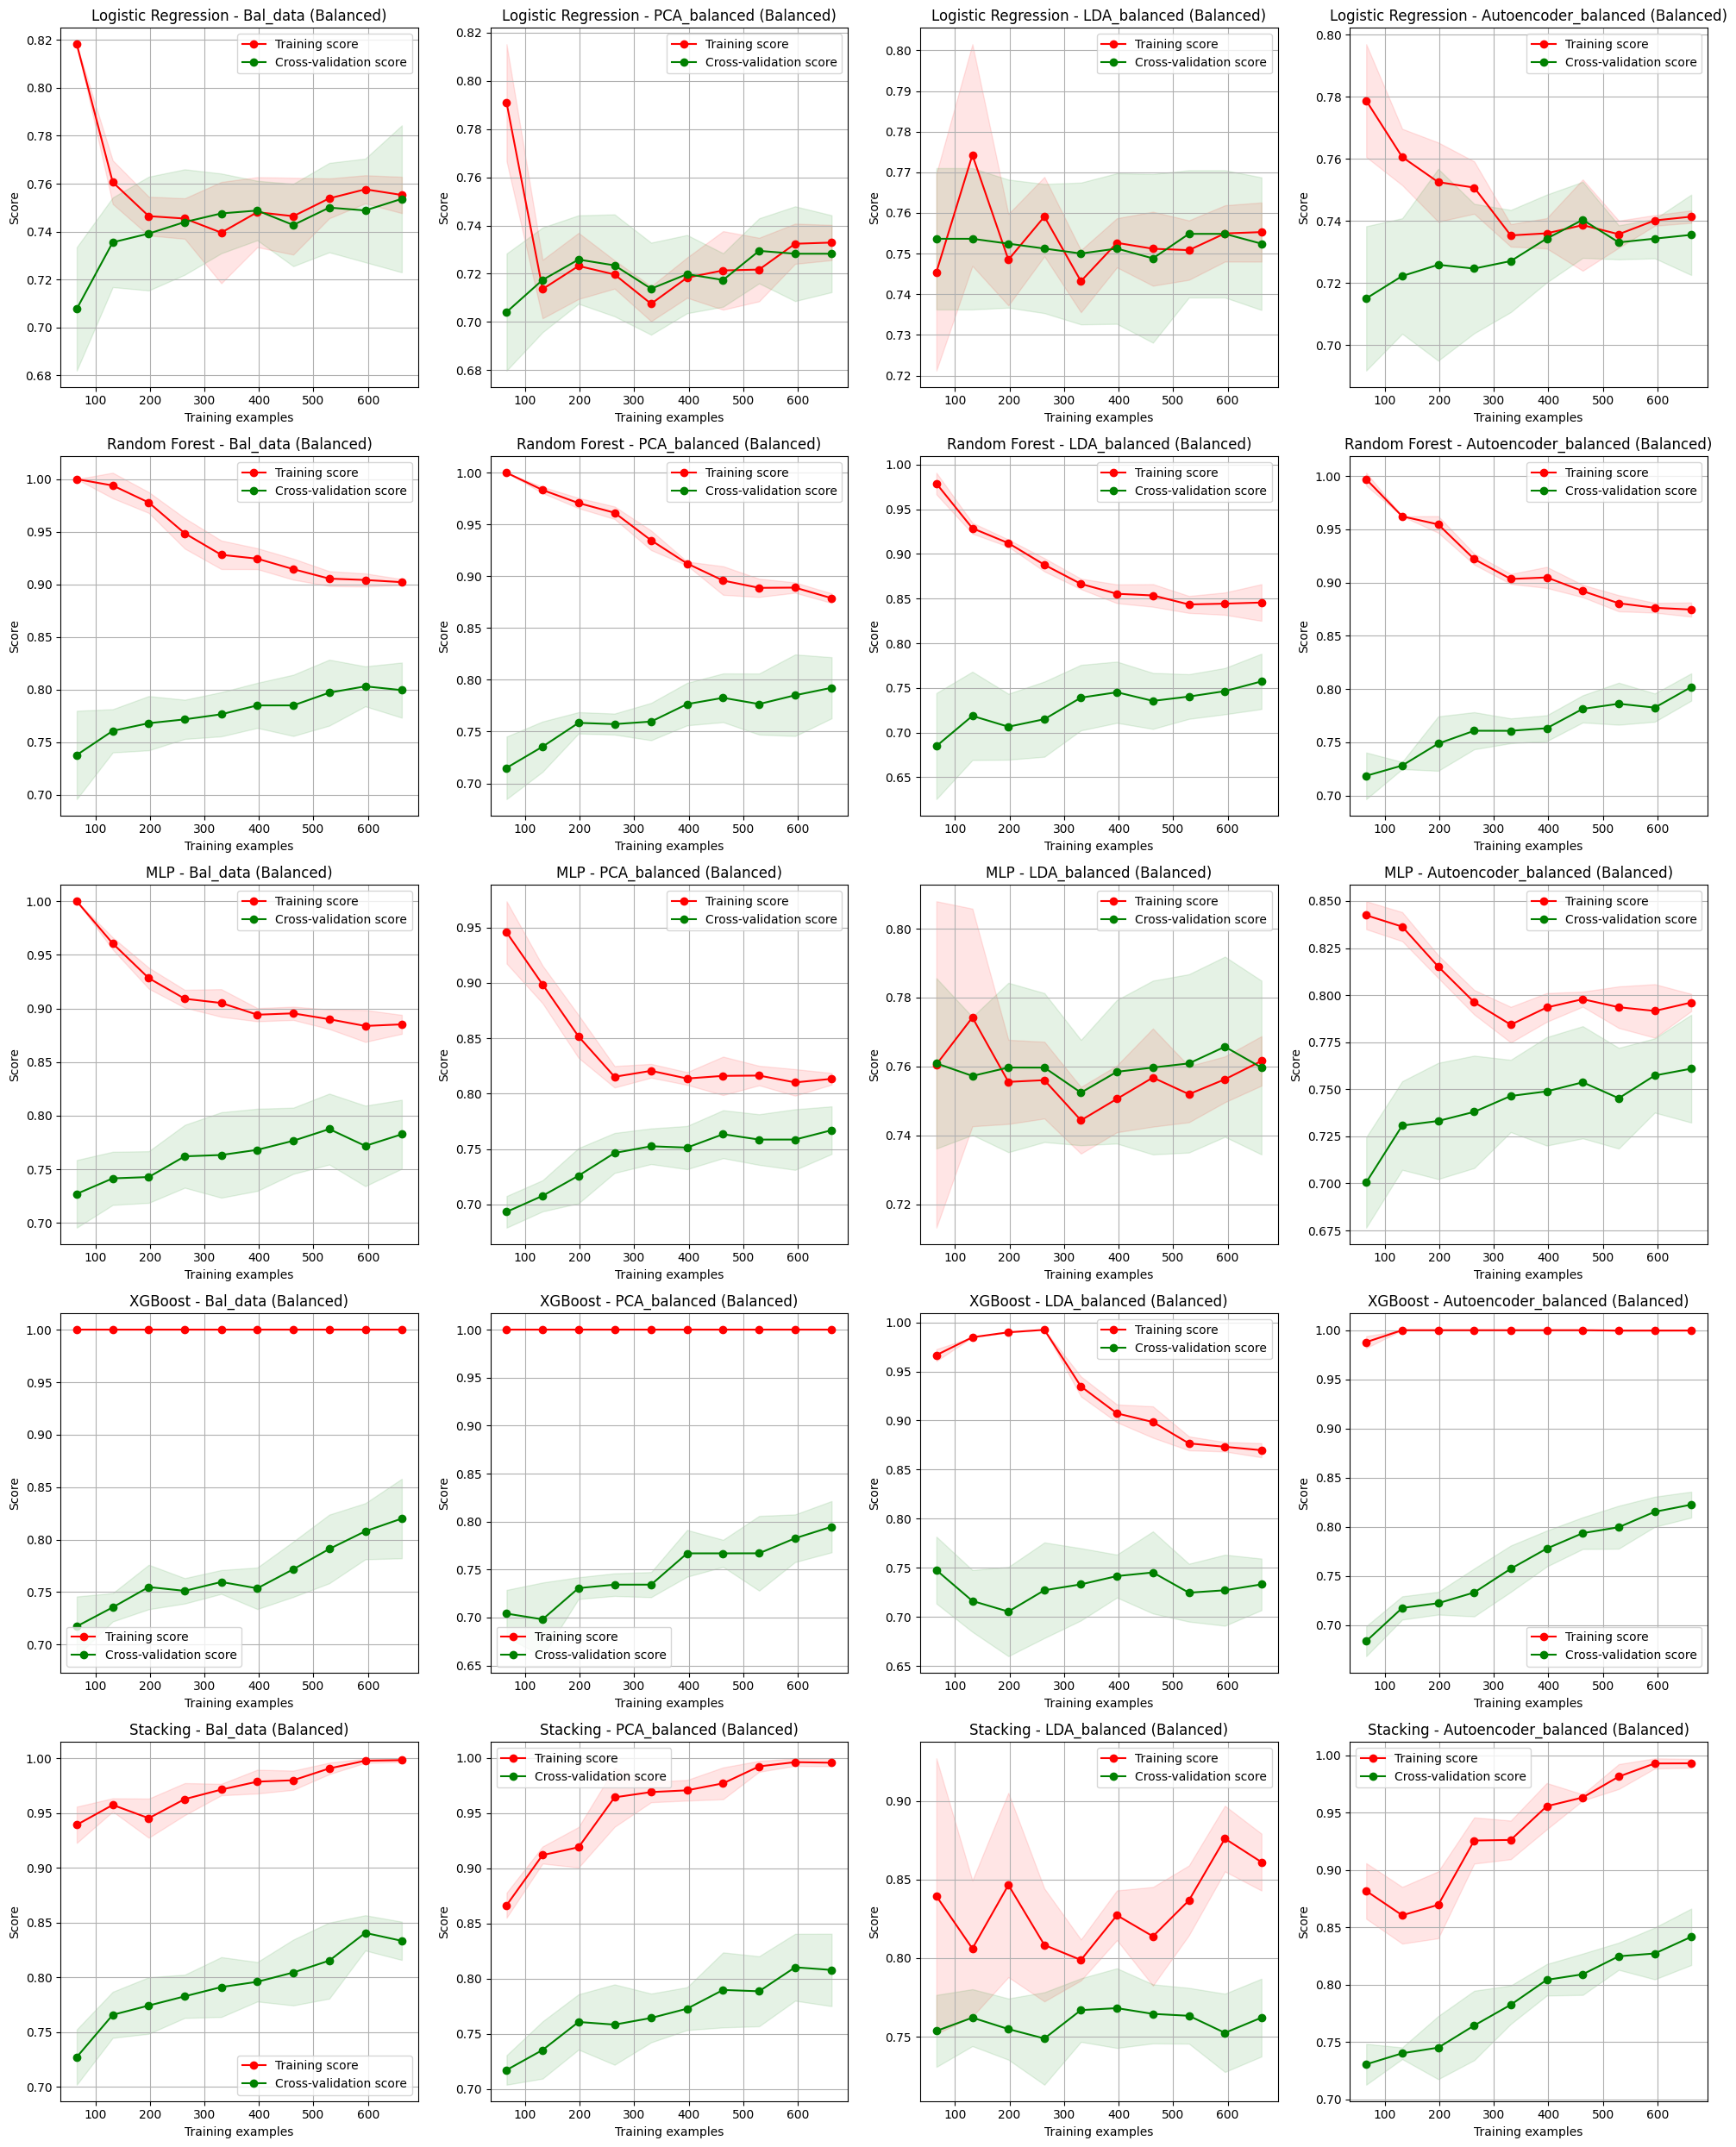

In [65]:
# Assign datasets for balanced transformations
balanced_datasets = {
    'Bal_data': (x_bal_train_sd, y_bal_train),
    'PCA_balanced': (x_bal_train_pca, y_bal_train),
    'LDA_balanced': (x_bal_train_lda, y_bal_train),
    'Autoencoder_balanced': (x_bal_train_auto, y_bal_train)
}
 
 
# Prepare the layout for the subplots for balanced datasets
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot learning curves for balanced datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in balanced_datasets.items():
        title = f"{model_name} - {transformation_name} (Balanced)"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index])
        ax_index += 1
 
plt.tight_layout()
plt.savefig('balanced_datasets_learning_curves.png', dpi=300)
plt.show()

Original Data: The stacking model shows signs of overfitting with a higher training score than the cross-validation score. This gap indicates that the model learns the training data well but doesn't generalize as effectively to unseen data.

Balanced Data: Balancing the data improves the cross-validation score, reducing the gap between training and validation, which suggests enhanced model generalization.

PCA Balanced: Applying PCA on the balanced data further closes the gap between training and validation scores, demonstrating that dimensionality reduction helps to avoid overfitting while retaining the ability to generalize.

Autoencoder Balanced: The autoencoder seems to perform similarly to PCA, maintaining high performance while generalizing well, as indicated by the close training and validation scores.

### Log- Loss Curves

Log loss, also known as logistic loss or cross-entropy loss, is a performance metric for evaluating the predictions of probabilities of membership to a given class.

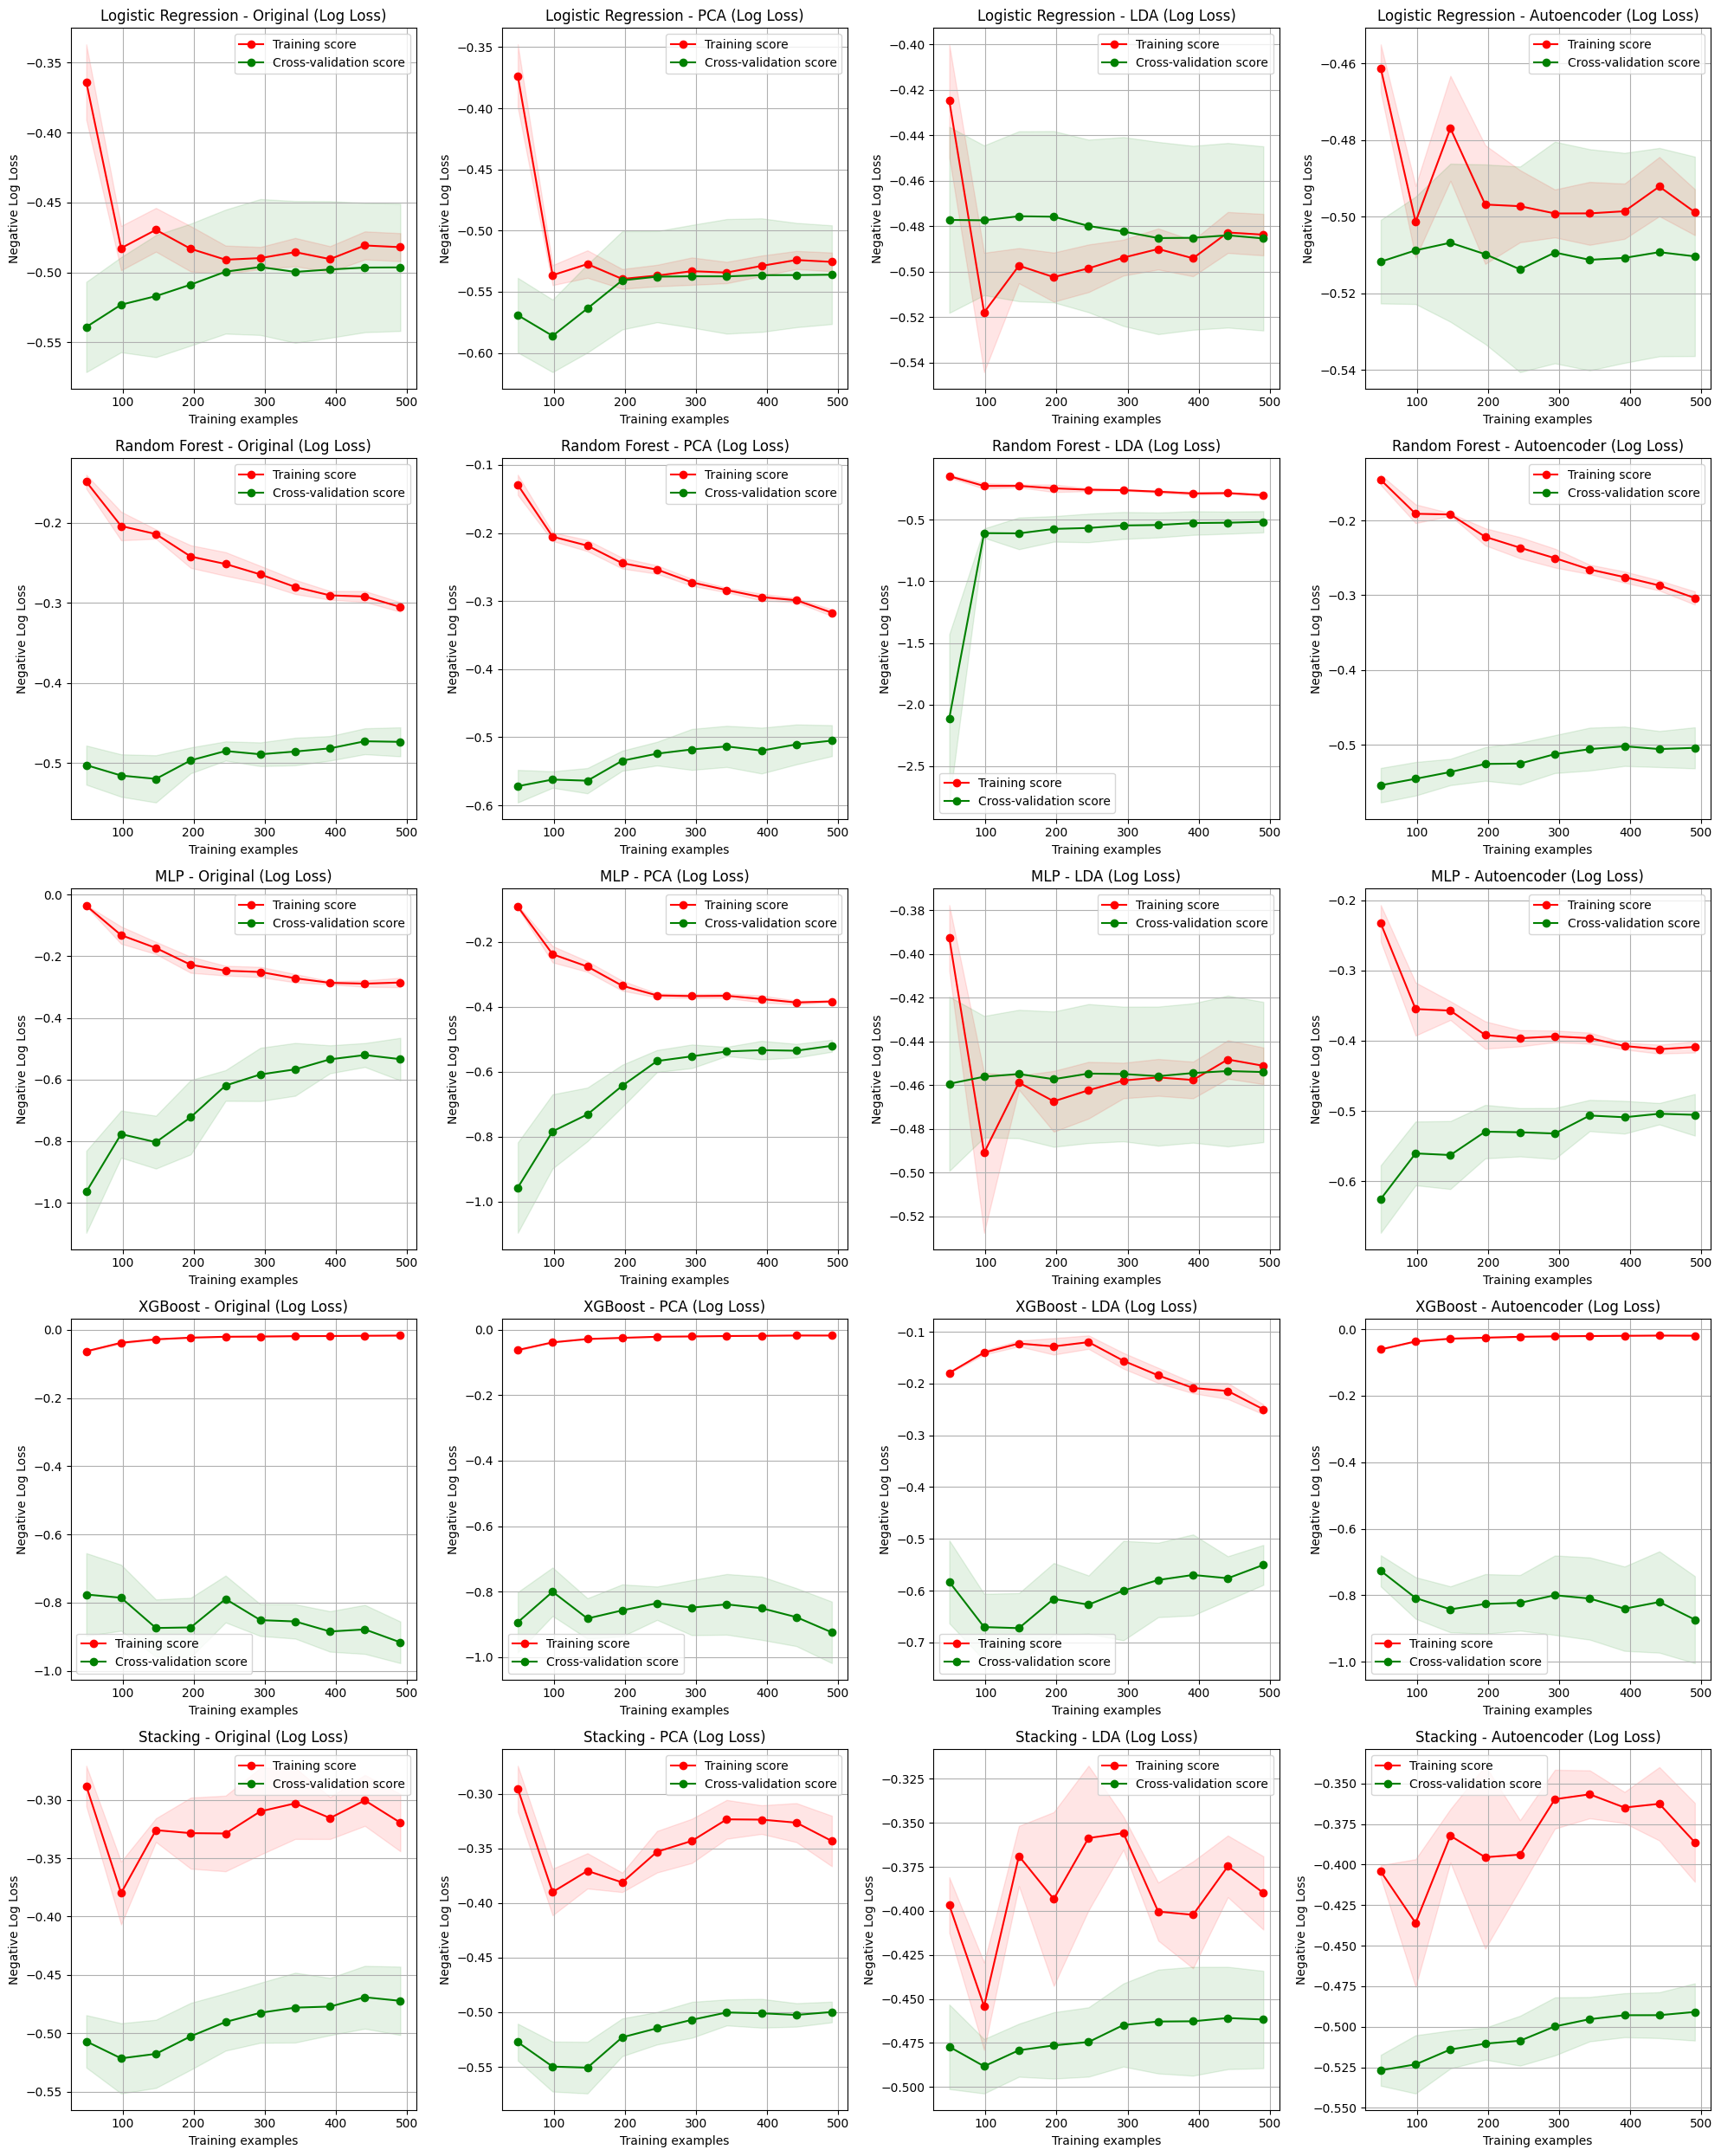

In [66]:
def plot_learning_curve(model, X, y, title, ax, scoring='accuracy'):
    # Adjust the learning_curve function call to include the scoring parameter
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring=scoring
    )
 
    # Calculate means and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
 
    # Plot learning curves
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
 
    ax.set_title(title)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score' if scoring == 'accuracy' else 'Negative Log Loss')
    ax.grid()
    ax.legend(loc="best")
 
 
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=0, class_weight='balanced', solver="liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=0, max_depth=6),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss'),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier())])
}
 
# Assign datasets for original transformations
original_datasets = {
    'Original': (x_train_sd, y_train),
    'PCA': (X_train_pca, y_train),
    'LDA': (X_train_lda, y_train),
    'Autoencoder': (X_train_auto_imbal, y_train)
}
 
# Prepare the layout for the subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot log loss curves for original datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in original_datasets.items():
        title = f"{model_name} - {transformation_name} (Log Loss)"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index], scoring='neg_log_loss')
        ax_index += 1
 
plt.tight_layout()
plt.savefig('original_datasets_log_loss_curves.png', dpi=300)
plt.show()

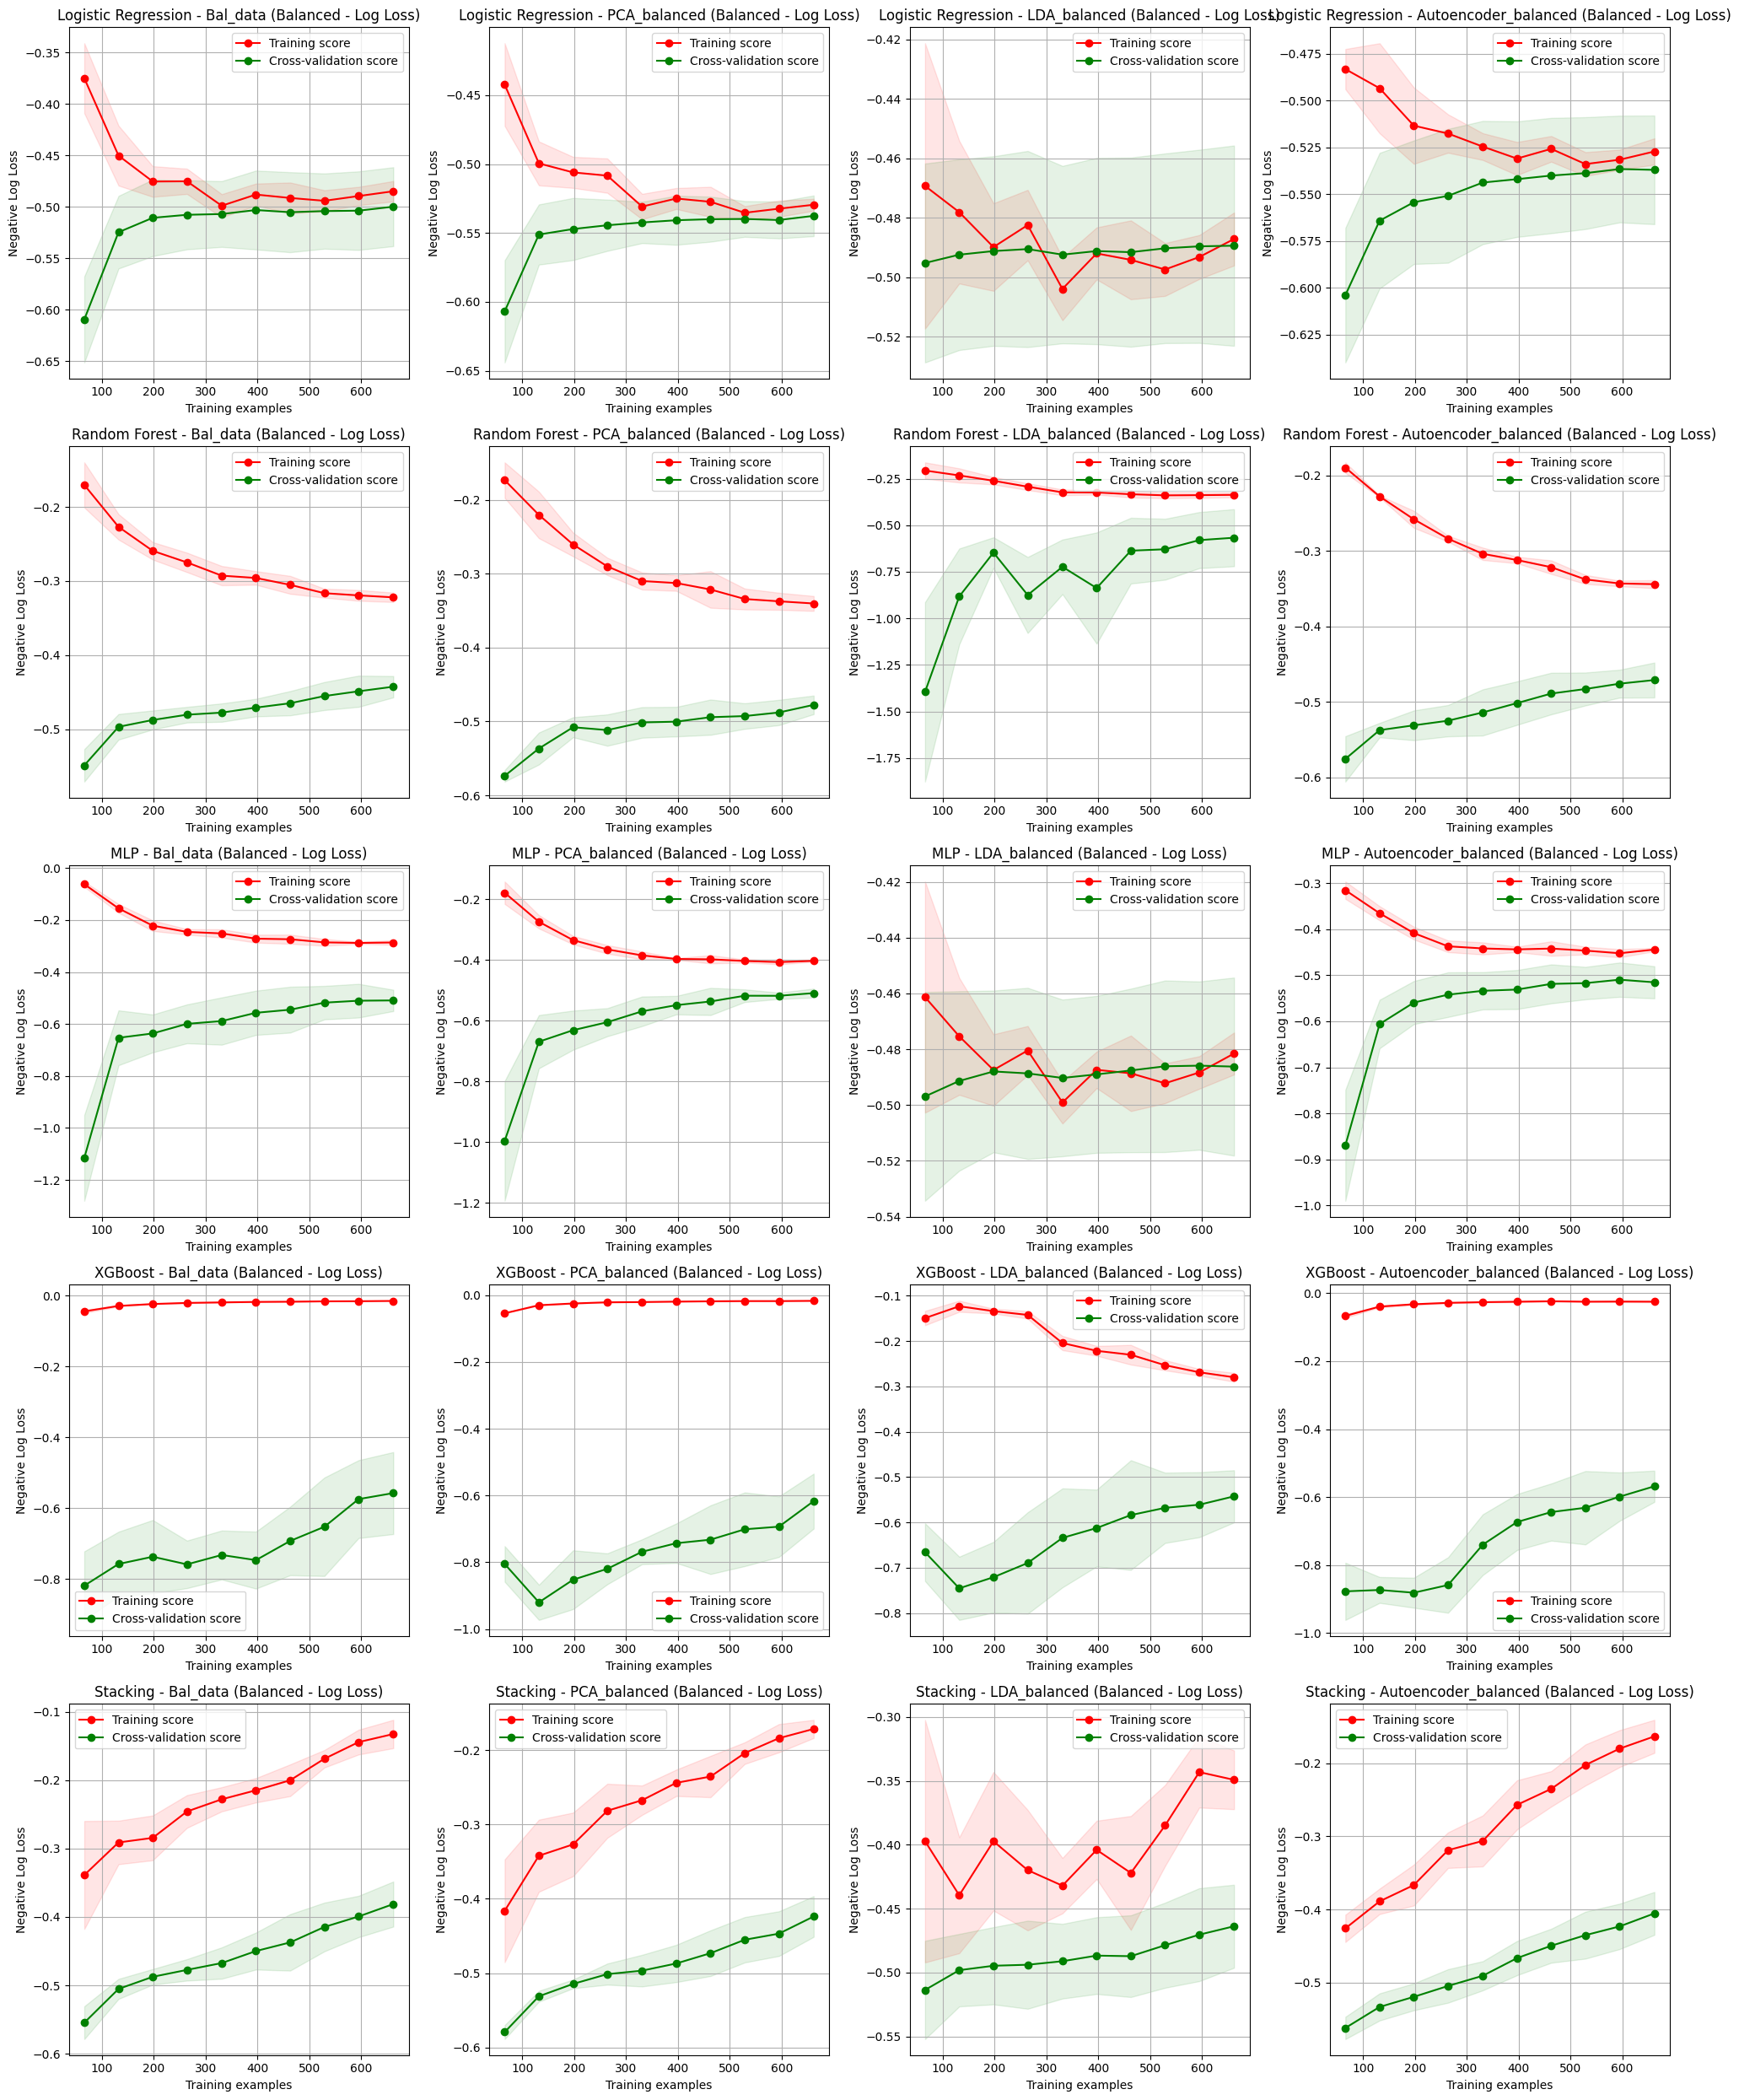

In [67]:
# Assign datasets for balanced transformations
balanced_datasets = {
    'Bal_data': (x_bal_train_sd, y_bal_train),
    'PCA_balanced': (x_bal_train_pca, y_bal_train),
    'LDA_balanced': (x_bal_train_lda, y_bal_train),
    'Autoencoder_balanced': (x_bal_train_auto, y_bal_train)
}
 
# Prepare the layout for the subplots for balanced datasets
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot log loss curves for balanced datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in balanced_datasets.items():
        title = f"{model_name} - {transformation_name} (Balanced - Log Loss)"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index], scoring='neg_log_loss')
        ax_index += 1
 
plt.tight_layout()
plt.savefig('balanced_datasets_log_loss_curves.png', dpi=300)
plt.show()

Models trained on the original imbalanced data started with higher uncertainty or inaccuracy.

Dimensionality reduction with PCA and autoencoders improved model performance, as evidenced by the decrease in log loss.

Balancing the data further decreased the log loss across all models, with the autoencoder transformation on balanced data providing the best results.

The best model for the Pima dataset was the one using the autoencoder on balanced data, which achieved the lowest log loss, indicating high confidence and accuracy in predictions.

In [68]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()
 
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Using the best model for web app deployment

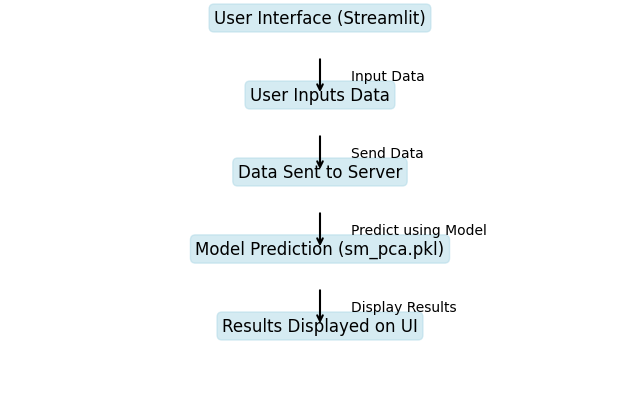

In [69]:
# Define the stages of the web application development
stages = [
    "User Interface (Streamlit)",
    "User Inputs Data",
    "Data Sent to Server",
    "Model Prediction (sm_pca.pkl)",
    "Results Displayed on UI"
]

# Define the connections between stages
connections = [
    "Input Data",
    "Send Data",
    "Predict using Model",
    "Display Results"
]

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')

# Plot each stage
for i, stage in enumerate(stages):
    ax.text(0.5, 1-(i*0.2), stage, ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))

# Plot connections
for i, connection in enumerate(connections):
    ax.annotate('', xy=(0.5, 0.9-(i*0.2)-0.1), xytext=(0.5, 0.9-(i*0.2)), arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(0.55, 0.9-(i*0.2)-0.05, connection, ha='left', va='center', fontsize=10)

plt.show()

Using Streamlit's user-friendly framework, a web application for diabetes prediction  will be deployed. The app's intuitive interface allows users to input their data and receive personalized prediction results. The deployment comprises of two different program modules as follows:
•	model.pkl- To enhance our diabetes prediction web app, we incorporated the most effective model from balanced Dataset 1 – the SC - PCA. This model showed superior performance on unseen data with an accuracy of 82.69%, recall of 92.59%, model was saved as 'sc_pca.pkl' for seamless deployment. 

•	app.py- The 'diabetes.py' script is the backbone of our web application, employing Streamlit's APIs to handle user interactions. Users can seamlessly input diabetes-related information through an intuitive graphical user interface (GUI). The app then uses the SC-PCA model to generate predictions and present the results visually appealingly 

- The shows the steps for app deployment

In [70]:
with open('./scaler_model.pkl', 'wb') as sc:
    pkl.dump(scaler, sc)

In [72]:
with open(r'./scaler_model.pkl', 'rb') as sc1:
    scaler_model = pkl.load(sc1)